## <center><bold>Quantium Data Analytics Task 2: Experimentation and Uplift Testing</bold></center><br>
<b>Testing the impact of a new store layout for the Chips Category on sales performance </b>

Whats going on?
-> A major retail chain wanted to know: **"If we redesign the chip aisle layout, will we sell more chips?"**

For that they ran a experiment as changing all their stores at once would have been too risky.

##### THE EXPERIMENT<br>
In ** Feb 2019**, the company rolled out a brand new store layout for the chips in three stores:
- Store 77
- Store 86
- Store 88

They let this new layout run for **3 months(Feb through April 2019)** to see what would happen.

##### THE PROBLEM <br>
Lets say Store 77's chip sales went up 20% during those 3 months. 
First thought, **"WOW IT WORKED"**, BUT **"IT MAY NOT BE WHAT IT SEEMS"**

Maybe the sales went up because:
- The season (People preferring chips in the Spring)
- There was a big promotion
- The economy was doing well

**How can we be sure that the rise in sales was because of the layout not because of the other factors?**

##### THE SOLUTION: FINDING "TWIN" STORES
We need to find stores that are like "twins" to our trial stores -stores that:
- Sold similar amounts of chips before the trial
- Had similar customer patterns before the trial
- Were in the similar market conditions
- But **did NOT get the new layout**

These "twin" stores are called **Control Stores**. We can call it a reference store.

This controlled store carry great significance here, as witH0ut the control store, any data or analysis of trial store would have not made any sense.

##### What are we going to do?
Right now, we have not the data called merged_df(cleaned, and merged dataset of both **QVI_transaction_data** and **QVI_purchase_behaviour_data**)
Now the process we are going to follow: 
1. Identify which stores have data from July 2018 to June 2019 (Full observation period)
2. Seperate the pre trial period and trial period.
3. Use pretrial period to find the twin stores for the trial stores (77,86,& 88)
4. Once we find the twin stores, we'll compare the trial period of trial stores and control stores.
5. Then only, we will conclude whether the new layout was effective or not.


##### BOTTOM LINE:
We're trying to answer: **"Did the new layout work,or would sales have gone up anyway?"**
Control stores helps to answer that with confidence.


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px

In [2]:
store_df=pd.read_csv('merged_data.csv')

In [3]:
store_df.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,SIZE_VALUES(GRAM),BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER,PRICE_PER_PACKET
0,2019-06-06,34,34057,31150,102,Kettle Mozzarella Basil & Pesto,2,10.8,175,Kettle,RETIREES,Budget,5.4
1,2019-03-04,245,245223,247682,102,Kettle Mozzarella Basil & Pesto,2,10.8,175,Kettle,RETIREES,Budget,5.4
2,2019-06-25,160,160226,161580,102,Kettle Mozzarella Basil & Pesto,2,10.8,175,Kettle,OLDER SINGLES/COUPLES,Budget,5.4
3,2019-04-10,65,65122,62177,102,Kettle Mozzarella Basil & Pesto,1,5.4,175,Kettle,OLDER FAMILIES,Budget,5.4
4,2018-09-22,91,91070,89505,102,Kettle Mozzarella Basil & Pesto,2,10.8,175,Kettle,YOUNG SINGLES/COUPLES,Mainstream,5.4


---

Client have selected store 77,86, and 88 as trial stores and want control stores that are operational for the entire observation period.

In [4]:
store_df[store_df['STORE_NBR'].isin([77,86,88])].head(4)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,SIZE_VALUES(GRAM),BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER,PRICE_PER_PACKET
94,2018-12-23,88,88340,87908,102,Kettle Mozzarella Basil & Pesto,2,10.8,175,Kettle,YOUNG FAMILIES,Premium,5.4
116,2019-03-21,88,88092,86672,102,Kettle Mozzarella Basil & Pesto,2,10.8,175,Kettle,YOUNG FAMILIES,Premium,5.4
132,2019-03-17,86,86006,84180,102,Kettle Mozzarella Basil & Pesto,2,10.8,175,Kettle,YOUNG SINGLES/COUPLES,Mainstream,5.4
201,2018-12-26,88,88187,87149,102,Kettle Mozzarella Basil & Pesto,2,10.8,175,Kettle,YOUNG SINGLES/COUPLES,Mainstream,5.4


Trial Period- Feb 2019- End of April 2019

We would want to match trial stores(77,86,88) to the control stores (the stores that are similar to the trial stores prior to the trial period of Feb 2019)

KPI of this comparisions:
- Monthly overall sales revenue
- Monthly number of customers
- Monthly number of transactions per customers.

In [5]:
store_df['DATE']=pd.to_datetime(store_df['DATE'])
store_df['Month_ID']=store_df['DATE'].dt.year*100+store_df['DATE'].dt.month

In [6]:

store_df.head(4)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,SIZE_VALUES(GRAM),BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER,PRICE_PER_PACKET,Month_ID
0,2019-06-06,34,34057,31150,102,Kettle Mozzarella Basil & Pesto,2,10.8,175,Kettle,RETIREES,Budget,5.4,201906
1,2019-03-04,245,245223,247682,102,Kettle Mozzarella Basil & Pesto,2,10.8,175,Kettle,RETIREES,Budget,5.4,201903
2,2019-06-25,160,160226,161580,102,Kettle Mozzarella Basil & Pesto,2,10.8,175,Kettle,OLDER SINGLES/COUPLES,Budget,5.4,201906
3,2019-04-10,65,65122,62177,102,Kettle Mozzarella Basil & Pesto,1,5.4,175,Kettle,OLDER FAMILIES,Budget,5.4,201904


---

<center> Metrics for comparison of control stores and trial stores </center>

For each store and each month we need to calculate total sales, number of customers, 
transactions per customers, chips per customer and the average price per customers.

In [7]:
monthly_metrics=store_df.groupby(['STORE_NBR','Month_ID']).agg(
    {
    'TOT_SALES':'sum', # total sales
    'LYLTY_CARD_NBR':'nunique', #number of customers
    'TXN_ID':'count', # Total numner of transaction
    'PROD_QTY':'sum' # Total chips/product sold

    }). reset_index()
monthly_metrics.columns=['STORE_NBR','MONTH_ID','TOTAL_SALES','NUMBER_CUSTOMERS','TOTAL_TRANSACTIONS',''
'TOTAL_CHIPS']
monthly_metrics.head(4)

,STORE_NBR,MONTH_ID,TOTAL_SALES,NUMBER_CUSTOMERS,TOTAL_TRANSACTIONS,TOTAL_CHIPS
0,1,201807,188.9,47,49,58
1,1,201808,168.4,41,41,52
2,1,201809,268.1,57,59,71
3,1,201810,175.4,39,40,51


In [8]:
# Derive metrics
monthly_metrics['TXN_PER_CUSTOMERS']=(monthly_metrics['TOTAL_TRANSACTIONS']/monthly_metrics['NUMBER_CUSTOMERS'])
monthly_metrics['CHIPS_PER_CUSTOMER']=(monthly_metrics['TOTAL_CHIPS']/monthly_metrics['NUMBER_CUSTOMERS'])
monthly_metrics['AVG_PRICE_PER_CUSTOMER']=(monthly_metrics['TOTAL_SALES']/monthly_metrics['NUMBER_CUSTOMERS'])

In [9]:
monthly_metrics.head()

,STORE_NBR,MONTH_ID,TOTAL_SALES,NUMBER_CUSTOMERS,TOTAL_TRANSACTIONS,TOTAL_CHIPS,TXN_PER_CUSTOMERS,CHIPS_PER_CUSTOMER,AVG_PRICE_PER_CUSTOMER
0,1,201807,188.9,47,49,58,1.042553,1.234043,4.019149
1,1,201808,168.4,41,41,52,1.000000,1.268293,4.107317
2,1,201809,268.1,57,59,71,1.035088,1.245614,4.703509
3,1,201810,175.4,39,40,51,1.025641,1.307692,4.497436
4,1,201811,184.8,44,45,55,1.022727,1.250000,4.200000


The pre trial period is upto Feb 2019 and the full is from july 2018 to June 2019

First lets figure out the stores that were operational in the entire periods.

In [10]:
all_month=monthly_metrics['MONTH_ID'].nunique()
all_month

12

In [11]:
store_months_counts=monthly_metrics.groupby("STORE_NBR")['MONTH_ID'].nunique()
operational_stores=store_months_counts[store_months_counts==12].index.tolist()

In [12]:
monthly_metrics['STORE_NBR'].nunique()

271

In [13]:
len(operational_stores)

259

Out of 271 stores, only 259 were operationally active through out the entire period.

In [14]:
operational_stores_monthly_metrics=monthly_metrics[monthly_metrics['STORE_NBR'].isin(operational_stores)].copy()

In [15]:
monthly_metrics.size

28485

In [16]:
operational_stores_monthly_metrics.size

27972

Around 513 row of data was removed.

---

 <center>Seperating Pre- Trial data (Data before February 2019) <br>
and Trial data (Data from Febraury 2019- April 2019)</center>

In [17]:
pre_trial_data=operational_stores_monthly_metrics[operational_stores_monthly_metrics['MONTH_ID']<201902]
pre_trial_data.tail()

,STORE_NBR,MONTH_ID,TOTAL_SALES,NUMBER_CUSTOMERS,TOTAL_TRANSACTIONS,TOTAL_CHIPS,TXN_PER_CUSTOMERS,CHIPS_PER_CUSTOMER,AVG_PRICE_PER_CUSTOMER
3155,272,201809,294.5,31,35,69,1.129032,2.225806,9.500000
3156,272,201810,405.1,41,48,94,1.170732,2.292683,9.880488
3157,272,201811,355.8,39,43,83,1.102564,2.128205,9.123077
3158,272,201812,363.1,43,43,81,1.000000,1.883721,8.444186
3159,272,201901,392.4,44,47,90,1.068182,2.045455,8.918182


In [18]:
trial_data=operational_stores_monthly_metrics[(operational_stores_monthly_metrics['MONTH_ID']>=201902) & (operational_stores_monthly_metrics['MONTH_ID']<201905) ]
trial_data.tail()

,STORE_NBR,MONTH_ID,TOTAL_SALES,NUMBER_CUSTOMERS,TOTAL_TRANSACTIONS,TOTAL_CHIPS,TXN_PER_CUSTOMERS,CHIPS_PER_CUSTOMER,AVG_PRICE_PER_CUSTOMER
3149,271,201903,699.6,76,96,192,1.263158,2.526316,9.205263
3150,271,201904,700.8,79,97,194,1.227848,2.455696,8.870886
3160,272,201902,385.3,44,47,89,1.068182,2.022727,8.756818
3161,272,201903,421.9,48,51,97,1.062500,2.020833,8.789583
3162,272,201904,445.1,54,56,105,1.037037,1.944444,8.242593


Note: Trial data is the data of the stores on the trial period. It is where we are trying a new store layout and this data is where we are doing monthly_metrics of the analysis.
The pretrial_store is the store we are using to just check and validate our results.

---

##### <center> Seperating trial and potential control stores </center>

Trial Stores 76,86,88, Now we have to figure out the control stores.
The way of figuring out the control store is to calculate H0w correlated the performance of each store is to the trial store.

In [19]:
trial_stores_trial_data=trial_data[trial_data['STORE_NBR'].isin([77,86,88])]
trial_stores_trial_data.head()

,STORE_NBR,MONTH_ID,TOTAL_SALES,NUMBER_CUSTOMERS,TOTAL_TRANSACTIONS,TOTAL_CHIPS,TXN_PER_CUSTOMERS,CHIPS_PER_CUSTOMER,AVG_PRICE_PER_CUSTOMER
887,77,201902,211.6,40,40,67,1.000000,1.675000,5.290000
888,77,201903,255.1,46,51,76,1.108696,1.652174,5.545652
889,77,201904,258.1,47,47,76,1.000000,1.617021,5.491489
984,86,201902,872.8,105,131,261,1.247619,2.485714,8.312381
985,86,201903,945.4,108,128,256,1.185185,2.370370,8.753704


In [20]:
trial_stores_pretrial_data=pre_trial_data[pre_trial_data['STORE_NBR'].isin([77,86,88])]
trial_stores_pretrial_data.head()

,STORE_NBR,MONTH_ID,TOTAL_SALES,NUMBER_CUSTOMERS,TOTAL_TRANSACTIONS,TOTAL_CHIPS,TXN_PER_CUSTOMERS,CHIPS_PER_CUSTOMER,AVG_PRICE_PER_CUSTOMER
880,77,201807,268.4,47,51,77,1.085106,1.638298,5.710638
881,77,201808,247.5,46,46,71,1.000000,1.543478,5.380435
882,77,201809,216.8,40,42,66,1.050000,1.650000,5.420000
883,77,201810,194.3,36,37,50,1.027778,1.388889,5.397222
884,77,201811,224.9,39,42,63,1.076923,1.615385,5.766667


In [21]:
Potential_control_stores=pre_trial_data[~pre_trial_data['STORE_NBR'].isin([77,86,88])].copy()

In [22]:
Potential_control_stores

,STORE_NBR,MONTH_ID,TOTAL_SALES,NUMBER_CUSTOMERS,TOTAL_TRANSACTIONS,TOTAL_CHIPS,TXN_PER_CUSTOMERS,CHIPS_PER_CUSTOMER,AVG_PRICE_PER_CUSTOMER
0,1,201807,188.9,47,49,58,1.042553,1.234043,4.019149
1,1,201808,168.4,41,41,52,1.000000,1.268293,4.107317
2,1,201809,268.1,57,59,71,1.035088,1.245614,4.703509
3,1,201810,175.4,39,40,51,1.025641,1.307692,4.497436
4,1,201811,184.8,44,45,55,1.022727,1.250000,4.200000
...,...,...,...,...,...,...,...,...,...
3155,272,201809,294.5,31,35,69,1.129032,2.225806,9.500000
3156,272,201810,405.1,41,48,94,1.170732,2.292683,9.880488
3157,272,201811,355.8,39,43,83,1.102564,2.128205,9.123077
3158,272,201812,363.1,43,43,81,1.000000,1.883721,8.444186


---

##### <center> Finding the twin (control store) </center>

Metrics: Transactions per customers [TXN_PER_CUSTOMERS] <br>
        Monthly overall sales revnue[TOTAL_SALES]<br>
        Monthly_overall_customers[NUMBER_CUSTOMERS]

#### Correlation

In [23]:
def find_control_stores(trial_stores_pretrial_data,potential_control_stores,visualize=True):
    """
    Find the best control stores for each trial store based on correlation across multiple metrics.

    Parameters:
    trial_stores_pretrial_data: Dataframe
    Pre_trial data for trial stores(77,86,88)

    potential_control_stores: DataFrame
    Pre_trial data for all non_trial stores

    visualize=True
    It calls the visualize_correlation function

    Returns:
    DataFrame with control store recommendation for each trial_stores
    """
    trial_stores=[77,86,88]
    metrics=['TOTAL_SALES','NUMBER_CUSTOMERS','TXN_PER_CUSTOMERS']

    potential_control_stores_list=potential_control_stores['STORE_NBR'].unique()

    #store all results
    all_results=[]

    for trial_store in trial_stores:
       # print(f"\n{'='*70}")
        #print(f"Finding control stores for trial store {trial_store}")
        #print(f"\n{'='*70}")

        trial_data=trial_stores_pretrial_data[
            trial_stores_pretrial_data['STORE_NBR']==trial_store].sort_values('MONTH_ID').reset_index(drop=True)
        
        #store correlations for each control stores
        store_correlations={}

        for control_store in potential_control_stores_list:
            #Getting the control store data
            control_data=potential_control_stores[
                potential_control_stores['STORE_NBR']==control_store
            ].sort_values('MONTH_ID').reset_index(drop=True)

            #store correlation for each metrics:
            correlations={}
            

            for metric in metrics:
                #MERGE on Month_ID
                trial_metric=trial_data[['MONTH_ID',metric]].rename(columns={metric:'trial'})
                control_metric=control_data[['MONTH_ID',metric]].rename(columns={metric:'control'})
                merged=trial_metric.merge(control_metric, on='MONTH_ID')
              
                #calculate correlation
                if len(merged)>=2:
                    if merged['trial'].std()>0 and merged['control'].std() >0:
                        corr=merged['trial'].corr(merged['control'])
                        correlations[metric]=corr
                    else:
                        correlations[metric]=None
                
            #Calculate the average correlation of all metrics

            valid_corrs=[va for va in correlations.values() if va is not None]
            if valid_corrs:
                avg_corr=sum(valid_corrs)/len(valid_corrs)
                store_correlations[control_store]={
                    'corr_sales':correlations['TOTAL_SALES'],
                    'corr_customers':correlations['NUMBER_CUSTOMERS'],
                    'corr_txn':correlations['TXN_PER_CUSTOMERS'],
                    'avg_correlation':avg_corr
                }
        #convert to Dataframe
        corr_df=pd.DataFrame.from_dict(store_correlations,orient='index')
        corr_df['CONTROL_STORE']=corr_df.index
        corr_df=corr_df.reset_index(drop=True)

        corr_df=corr_df.sort_values('avg_correlation',ascending=False)

        corr_df['TRIAL_STORE']=trial_store
        
        #Reorder columns
        corr_df=corr_df[['TRIAL_STORE','CONTROL_STORE','corr_sales','corr_customers','corr_txn','avg_correlation']]

        #print(f"\nTop 3  control store candidates:")
        #print(corr_df.head(3).to_string(index=False))

        

        #STORE RESULTS
        all_results.append(corr_df)
    
    final_results=pd.concat(all_results,ignore_index=True)

    if visualize:
        visualize_correlations(final_results)

    return final_results



        






In [24]:
def visualize_correlations(final_results):
    """
    It is an internal function to create correlation visualization for top control stores
    Parameter:
    final_results: DataFrame
    """
    trial_stores=final_results['TRIAL_STORE'].unique()
    fig,axes=plt.subplots(len(trial_stores),1,figsize=(10,5*len(trial_stores)))

    for idx,trial_store in enumerate(trial_stores):
        # Filter data for this trial store
        trial_data=final_results[final_results['TRIAL_STORE']==trial_store].copy()

        #Get top stores
        top_stores=trial_data.nlargest(3,'avg_correlation')

        # Prepare the data for heatmap
        heatmap_data=top_stores[['corr_sales','corr_customers','corr_txn']].T
        heatmap_data.columns=[f"Store {int(x)}" for x in top_stores['CONTROL_STORE']]
        heatmap_data.index=['Sales','Customers','Txn/Customer']

        #empty row with Nan values that will be masked
        spacer_row=pd.DataFrame([[np.nan]*len(heatmap_data.columns)],
                                columns=heatmap_data.columns,
                                index=[''])

        #add average correlations as a row
        avg_row=pd.DataFrame([top_stores['avg_correlation'].values],
                            columns=heatmap_data.columns,
                            index=['Avg Correlation'])
        
        heatmap_data=pd.concat([heatmap_data,spacer_row,avg_row])

        #create mask for the spacer row only
        mask= pd.DataFrame(False,index=heatmap_data.index,columns=heatmap_data.columns)
        mask.loc['']= True

        #Ensure no Nan or None values
        heatmap_data=heatmap_data.fillna(0)

        # create heatmap
        ax=axes[idx]
        sns.heatmap(heatmap_data,annot=True, cmap='RdYlGn', vmin=-1, vmax=1, center=0,
                    cbar_kws={'label':'Correlation Coefficient' }, ax=ax, linewidths=1,
                    linecolor='white',mask=mask)
        
       
        # Add a H0rizontal line to seperate average from individual store
        ax.hlines([3],*ax.get_xlim(),colors='black',linewidth=3)
        ax.set_title(f'Trial store:{trial_store}-- Top 3 Control Stores by Correlation', fontsize=13, pad=15)
        ax.set_ylabel('Metrics', fontsize=11)
        ax.set_xlabel('Control Store Number', fontsize=11)
      
    plt.tight_layout()
    plt.show()

        
    

    

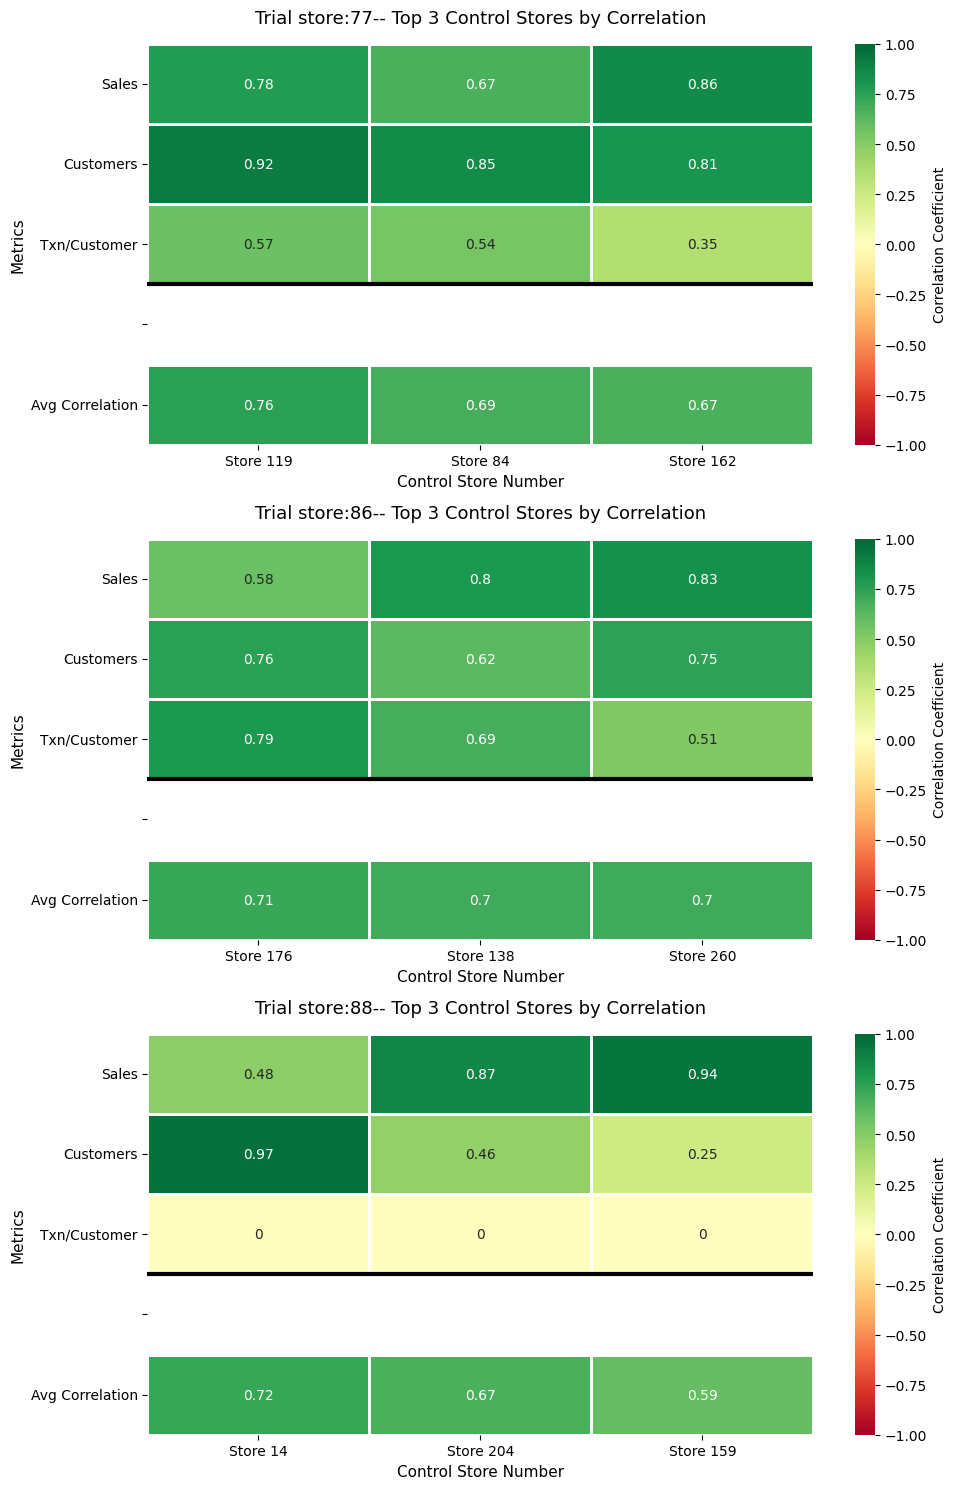

,TRIAL_STORE,CONTROL_STORE,corr_sales,corr_customers,corr_txn,avg_correlation
0,77,119,0.775571,0.919064,0.571447,0.755361
1,77,84,0.666157,0.851521,0.543934,0.687204
2,77,162,0.857584,0.811532,0.345759,0.671625
3,77,3,0.660447,0.755249,0.424751,0.613482
4,77,233,0.973643,0.965682,-0.162093,0.592411
...,...,...,...,...,...,...
763,88,8,-0.634070,-0.377091,-0.484478,-0.498547
764,88,270,-0.695938,-0.074695,-0.892528,-0.554387
765,88,175,-0.831593,-0.368608,-0.476383,-0.558861
766,88,23,-0.891573,-0.157431,-0.732566,-0.593857


In [25]:
results_corr=find_control_stores(trial_stores_pretrial_data,Potential_control_stores)
results_corr

Best Matched control store for each trial store

In [26]:
best_match=results_corr.groupby('TRIAL_STORE').first().reset_index()
best_match

,TRIAL_STORE,CONTROL_STORE,corr_sales,corr_customers,corr_txn,avg_correlation
0,77,119,0.775571,0.919064,0.571447,0.755361
1,86,176,0.582468,0.756402,0.794317,0.711063
2,88,14,0.479135,0.967364,0.386764,0.723249


In [27]:
print(best_match[['TRIAL_STORE','CONTROL_STORE','avg_correlation']].to_string(index=False))

 TRIAL_STORE  CONTROL_STORE  avg_correlation
          77            119         0.755361
          86            176         0.711063
          88             14         0.723249


---

#### Absolute Difference

In [28]:
def calculate_magnitude_difference(trial_stores_pretrial_data,potential_control_stores,visualize=True):
    """
    Finding the best control stores for each trial store based on the normalized differences across multiple metrics.
    Flow:
    Find the value difference between different values of the metrics between the trial 
    and controlled stored, then normalize it and then give the value, that have the smallest
    magnitude of the difference

    Parameters:
    trial_stores_pretrial_data: DataFrame
    pre_trial data for trial stores(77,86,88)

    potential_control_stores: DataFrame
    pre_trial data for all non_trial stores

    Returns: DataFrame
    Control store recommendation for each trial_store based on magnitude differences

    Visualization
    """
    trial_stores=[77,86,88]
    metrics=['TOTAL_SALES','NUMBER_CUSTOMERS','TXN_PER_CUSTOMERS']

    potential_control_stores_list=potential_control_stores['STORE_NBR'].unique()

    #Store allresults
    complete_results=[]

    for trial_store in trial_stores:
        #print(f"\n{"="*100}")
        #print(f"Finding control stores for each trial store {trial_store} (based on magnitude_differnces)")
        #print(f"\n{"="*100}")

        trial_data=trial_stores_pretrial_data[
                    trial_stores_pretrial_data['STORE_NBR']==trial_store].sort_values('MONTH_ID').reset_index(drop=True)
        
        #First Pass: collect all differences for normalizaiton
        all_diffs_by_metric={}
        control_store_raw_diffs={}

        for metric in metrics:
            all_diffs_by_metric[metric]=[]

            #control store
            for control_store in potential_control_stores_list:
                control_data=potential_control_stores[
                            potential_control_stores['STORE_NBR']==control_store
                            ].sort_values('MONTH_ID').reset_index(drop=True)

                #Merge on MONTH_ID
                trial_metric=trial_data[['MONTH_ID',metric]].rename(columns={metric:'trial'})
                control_metric=control_data[['MONTH_ID',metric]].rename(columns={metric:'control'})
                merged=trial_metric.merge(control_metric,on='MONTH_ID')
                
                if len(merged)>0:
                    merged['abs_diff']=abs(merged['trial']-merged['control'])

                    #store for this control store
                    if control_store not in control_store_raw_diffs:
                        control_store_raw_diffs[control_store]={}
                    control_store_raw_diffs[control_store][metric]=merged[['MONTH_ID','abs_diff']].copy()

                    #Collect all the differences for this metric
                    all_diffs_by_metric[metric].extend(merged['abs_diff'].tolist())
                    #extend helps to put all the data in one scale and it adds data as 
                    #individual items not as an entire list of one item

        
        #Second Pass: Normalize and calculate distances
        store_distances={}
        for control_store in potential_control_stores_list:
            if control_store not in control_store_raw_diffs:
                continue

            #store normalized distances for each metric
            distances={}

            for metric in metrics:
                if metric in control_store_raw_diffs[control_store]:
                    store_diffs= control_store_raw_diffs[control_store][metric]

                    # Get min and max for this metric across all stores
                    min_diff=min(all_diffs_by_metric[metric])
                    max_diff=max(all_diffs_by_metric[metric])

                    #Normalize:(value-min)/(max-min)

                    if max_diff > min_diff:
                        store_diffs['normalized']=(store_diffs['abs_diff']-min_diff)/(max_diff-min_diff)
                    else:
                        store_diffs['normalized']=0

                    # Average normalized distance across all months
                    avg_normalized_dist=store_diffs['normalized'].mean()
                    distances[metric]=avg_normalized_dist
                else:
                    distances[metric]=None
            
            valid_dists=[va for va in distances.values() if va is not None]

            if valid_dists:
                avg_dist=sum(valid_dists)/len(valid_dists)
                store_distances[control_store]={
                    'dist_sales':distances['TOTAL_SALES'],
                    'dist_customers':distances['NUMBER_CUSTOMERS'],
                    'dist_txn':distances['TXN_PER_CUSTOMERS'],
                    'avg_magnitude_distance': avg_dist
                }
        
        #Convert to DataFrame
        dist_df=pd.DataFrame.from_dict(store_distances,orient='index')
        dist_df['CONTROL_STORE']=dist_df.index
        dist_df=dist_df.reset_index(drop=True)
        dist_df=dist_df.sort_values('avg_magnitude_distance',ascending=True) # Smaller the distance the better
        dist_df['TRIAL_STORE']=trial_store

        #Reordering the columns
        dist_df=dist_df[['TRIAL_STORE','CONTROL_STORE','dist_sales','dist_customers',
                        'dist_txn','avg_magnitude_distance']]
        
        #print(f"\n Top 3 control store candidates (smallest distance):")
        #print(dist_df.head(3).to_string(index=False))

        #store results
        complete_results.append(dist_df)
    
    complete_results = pd.concat(complete_results, ignore_index=True)

    if visualize:
        visualize_differences(complete_results)

    return complete_results

In [29]:
def visualize_differences(complete_results):
    """
    It is an internal function to create differnces visualization for top control store
    Parameter
    complete_results: DataFrame
    """
    trial_stores=complete_results['TRIAL_STORE'].unique()
    fig,axes=plt.subplots(len(trial_stores),1,figsize=(10,5*len(trial_stores)))

    for idx,trial_store in enumerate(trial_stores):
        # Filter data for this trial store
        trial_data=complete_results[complete_results['TRIAL_STORE']==trial_store].copy()

        #Get top_stores
        top_stores=trial_data.nlargest(3,'avg_magnitude_distance')

        # Prepare the data for the heatmap
        heatmap_data=top_stores[['dist_sales','dist_customers','dist_txn']].T
        heatmap_data.columns=[f"Store {int(x)}" for x in top_stores['CONTROL_STORE']]
        heatmap_data.index=['Sales','Customers','Txn/Customer']

        #spacer row
        spacer_row=pd.DataFrame([[np.nan]*len(heatmap_data.columns)],
                                columns=heatmap_data.columns,
                                index=[''])
        
        #add average magnitude distance as a row
        avg_row=pd.DataFrame([top_stores['avg_magnitude_distance'].values],
                            columns=heatmap_data.columns,
                            index=['Avg Distance'])
        
        heatmap_data=pd.concat([heatmap_data,spacer_row,avg_row])

        # creating a mask for spacer row
        mask=pd.DataFrame(False,index=heatmap_data.index,columns=heatmap_data.columns)
        mask.loc['']=True

        # Ensure no Nan or None values
        heatmap_data=heatmap_data.fillna(0)

        # create heatmap
        ax=axes[idx]
        sns.heatmap(heatmap_data,annot=True, cmap='RdYlGn',vmin=0,vmax=1,
                    cbar_kws={'label':'Difference magnitude'},ax=ax, linewidths=1,
                    linecolor='white',mask=mask)
        
        #Add a H0rizontal line to seperate 
        ax.hlines([3],*ax.get_xlim(),colors='black',linewidth=3)
        ax.set_title(f'Trial store:{trial_store}--Top 3 Control Stores by Magnitude of Differences',fontsize=13, pad=15)
        ax.set_ylabel('Metrics',fontsize=11)
        ax.set_xlabel('Control Store Number', fontsize=11)

    plt.tight_layout()
    plt.show()



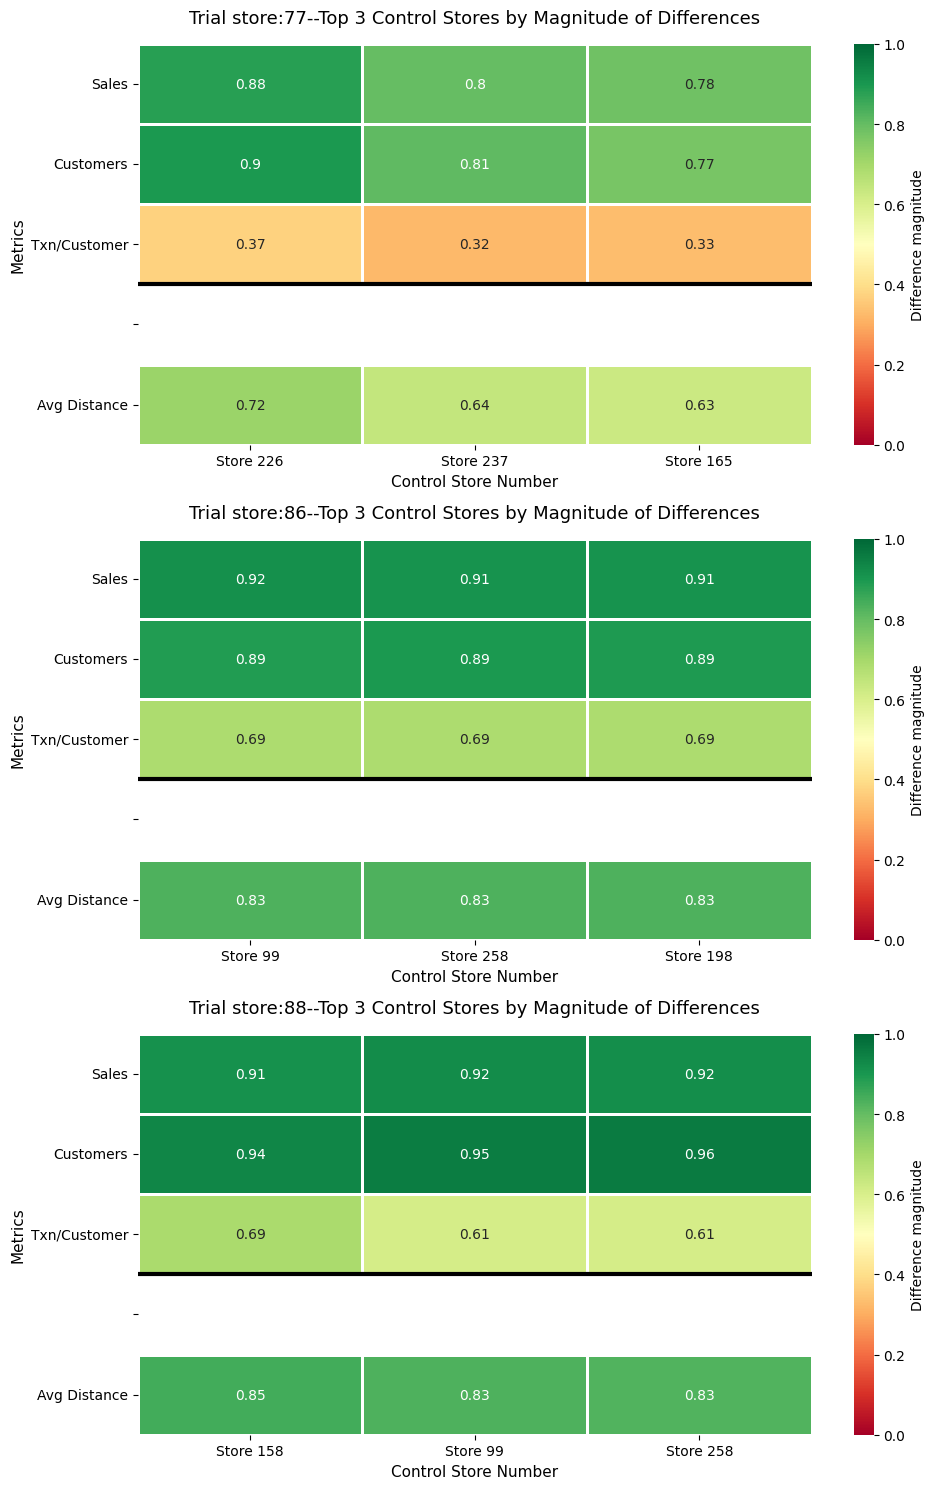

,TRIAL_STORE,CONTROL_STORE,dist_sales,dist_customers,dist_txn,avg_magnitude_distance
0,77,233,0.013298,0.008487,0.093993,0.038593
1,77,176,0.033114,0.060820,0.056273,0.050069
2,77,46,0.024989,0.039604,0.089402,0.051331
3,77,145,0.055457,0.042433,0.057358,0.051749
4,77,111,0.034755,0.045262,0.082460,0.054159
...,...,...,...,...,...,...
763,88,146,0.918106,0.951220,0.607083,0.825469
764,88,198,0.919323,0.955865,0.607083,0.827424
765,88,258,0.918159,0.958188,0.607083,0.827810
766,88,99,0.923757,0.953542,0.607083,0.828127


In [30]:
results_diff=calculate_magnitude_difference(trial_stores_pretrial_data,Potential_control_stores,visualize=True)
results_diff


---

---

###  <Center> Merger of Correlation and Magnitude </center>

In [31]:
corr_results=find_control_stores(trial_stores_pretrial_data,Potential_control_stores,visualize=False)
corr_results

,TRIAL_STORE,CONTROL_STORE,corr_sales,corr_customers,corr_txn,avg_correlation
0,77,119,0.775571,0.919064,0.571447,0.755361
1,77,84,0.666157,0.851521,0.543934,0.687204
2,77,162,0.857584,0.811532,0.345759,0.671625
3,77,3,0.660447,0.755249,0.424751,0.613482
4,77,233,0.973643,0.965682,-0.162093,0.592411
...,...,...,...,...,...,...
763,88,8,-0.634070,-0.377091,-0.484478,-0.498547
764,88,270,-0.695938,-0.074695,-0.892528,-0.554387
765,88,175,-0.831593,-0.368608,-0.476383,-0.558861
766,88,23,-0.891573,-0.157431,-0.732566,-0.593857


In [32]:
magnitude_results=calculate_magnitude_difference(trial_stores_pretrial_data,Potential_control_stores,visualize=False)
magnitude_results


,TRIAL_STORE,CONTROL_STORE,dist_sales,dist_customers,dist_txn,avg_magnitude_distance
0,77,233,0.013298,0.008487,0.093993,0.038593
1,77,176,0.033114,0.060820,0.056273,0.050069
2,77,46,0.024989,0.039604,0.089402,0.051331
3,77,145,0.055457,0.042433,0.057358,0.051749
4,77,111,0.034755,0.045262,0.082460,0.054159
...,...,...,...,...,...,...
763,88,146,0.918106,0.951220,0.607083,0.825469
764,88,198,0.919323,0.955865,0.607083,0.827424
765,88,258,0.918159,0.958188,0.607083,0.827810
766,88,99,0.923757,0.953542,0.607083,0.828127


In [33]:
corr_mag_df=corr_results.merge(magnitude_results,on=['TRIAL_STORE','CONTROL_STORE'],how='inner')
corr_mag_df

,TRIAL_STORE,CONTROL_STORE,corr_sales,corr_customers,corr_txn,avg_correlation,dist_sales,dist_customers,dist_txn,avg_magnitude_distance
0,77,119,0.775571,0.919064,0.571447,0.755361,0.515491,0.524752,0.182748,0.407664
1,77,84,0.666157,0.851521,0.543934,0.687204,0.160158,0.073550,0.074147,0.102618
2,77,162,0.857584,0.811532,0.345759,0.671625,0.423541,0.519095,0.328342,0.423659
3,77,3,0.660447,0.755249,0.424751,0.613482,0.611208,0.616690,0.249036,0.492311
4,77,233,0.973643,0.965682,-0.162093,0.592411,0.013298,0.008487,0.093993,0.038593
...,...,...,...,...,...,...,...,...,...,...
763,88,8,-0.634070,-0.377091,-0.484478,-0.498547,0.667069,0.659698,0.465684,0.597483
764,88,270,-0.695938,-0.074695,-0.892528,-0.554387,0.277021,0.189315,0.324699,0.263678
765,88,175,-0.831593,-0.368608,-0.476383,-0.558861,0.257661,0.205575,0.180339,0.214525
766,88,23,-0.891573,-0.157431,-0.732566,-0.593857,0.343979,0.260163,0.285362,0.296501


Note:
The measurement of goodness is in opposite direction in the case of correlation and 
in the case of  magnitude of differences

i.e. In correlation the value close to 1 is considered is considered great, 
whereas in the magnitude of differences its considered bad

and
The scale of measurement is also different <br>
Correlation: -1 to 1
Magnitude_difference: 0-1
Hence Normalization is very essential here

In [34]:
corr_mag_df['corr_normalized']=(corr_mag_df['avg_correlation']+1)/2
"""
Original Correlation                    Normalized Correlation
-1 <- worst                             0 <- Worst
0<- No correlation                      0.5 <- No correlation
+1 <-- Best Correaltion                 +1 <- Best correlation

"""

corr_mag_df['dist_normalized']=1-corr_mag_df['avg_magnitude_distance']

#Both are now on [0,1] scale where higher=better
corr_mag_df['combined_score']=(corr_mag_df['corr_normalized']+
                               corr_mag_df['dist_normalized'])/2


In [35]:
corr_mag_df.head()

,TRIAL_STORE,CONTROL_STORE,corr_sales,corr_customers,corr_txn,avg_correlation,dist_sales,dist_customers,dist_txn,avg_magnitude_distance,corr_normalized,dist_normalized,combined_score
0,77,119,0.775571,0.919064,0.571447,0.755361,0.515491,0.524752,0.182748,0.407664,0.877680,0.592336,0.735008
1,77,84,0.666157,0.851521,0.543934,0.687204,0.160158,0.073550,0.074147,0.102618,0.843602,0.897382,0.870492
2,77,162,0.857584,0.811532,0.345759,0.671625,0.423541,0.519095,0.328342,0.423659,0.835812,0.576341,0.706077
3,77,3,0.660447,0.755249,0.424751,0.613482,0.611208,0.616690,0.249036,0.492311,0.806741,0.507689,0.657215
4,77,233,0.973643,0.965682,-0.162093,0.592411,0.013298,0.008487,0.093993,0.038593,0.796205,0.961407,0.878806


In [36]:
#selecting the control store based on highest combined_store
control_stores_of_trial_stores=corr_mag_df.sort_values(['TRIAL_STORE','combined_score'],
                                                       ascending=[True, False]).drop_duplicates('TRIAL_STORE').reset_index(drop=True)


  

In [37]:
print(control_stores_of_trial_stores[['TRIAL_STORE','CONTROL_STORE','combined_score']])

   TRIAL_STORE  CONTROL_STORE  combined_score
0           77            233        0.878806
1           86            138        0.886573
2           88            201        0.810178


The twin (Control Store of)<br>
1. TRIAL STORE 77 -> STORE 233
1. TRIAL STORE 86 --> STORE 138
1. TRIAL STORE 88 --> STORE 201

---

#### <Center> VISUALIZING THE COMBINED SCORE <Center>


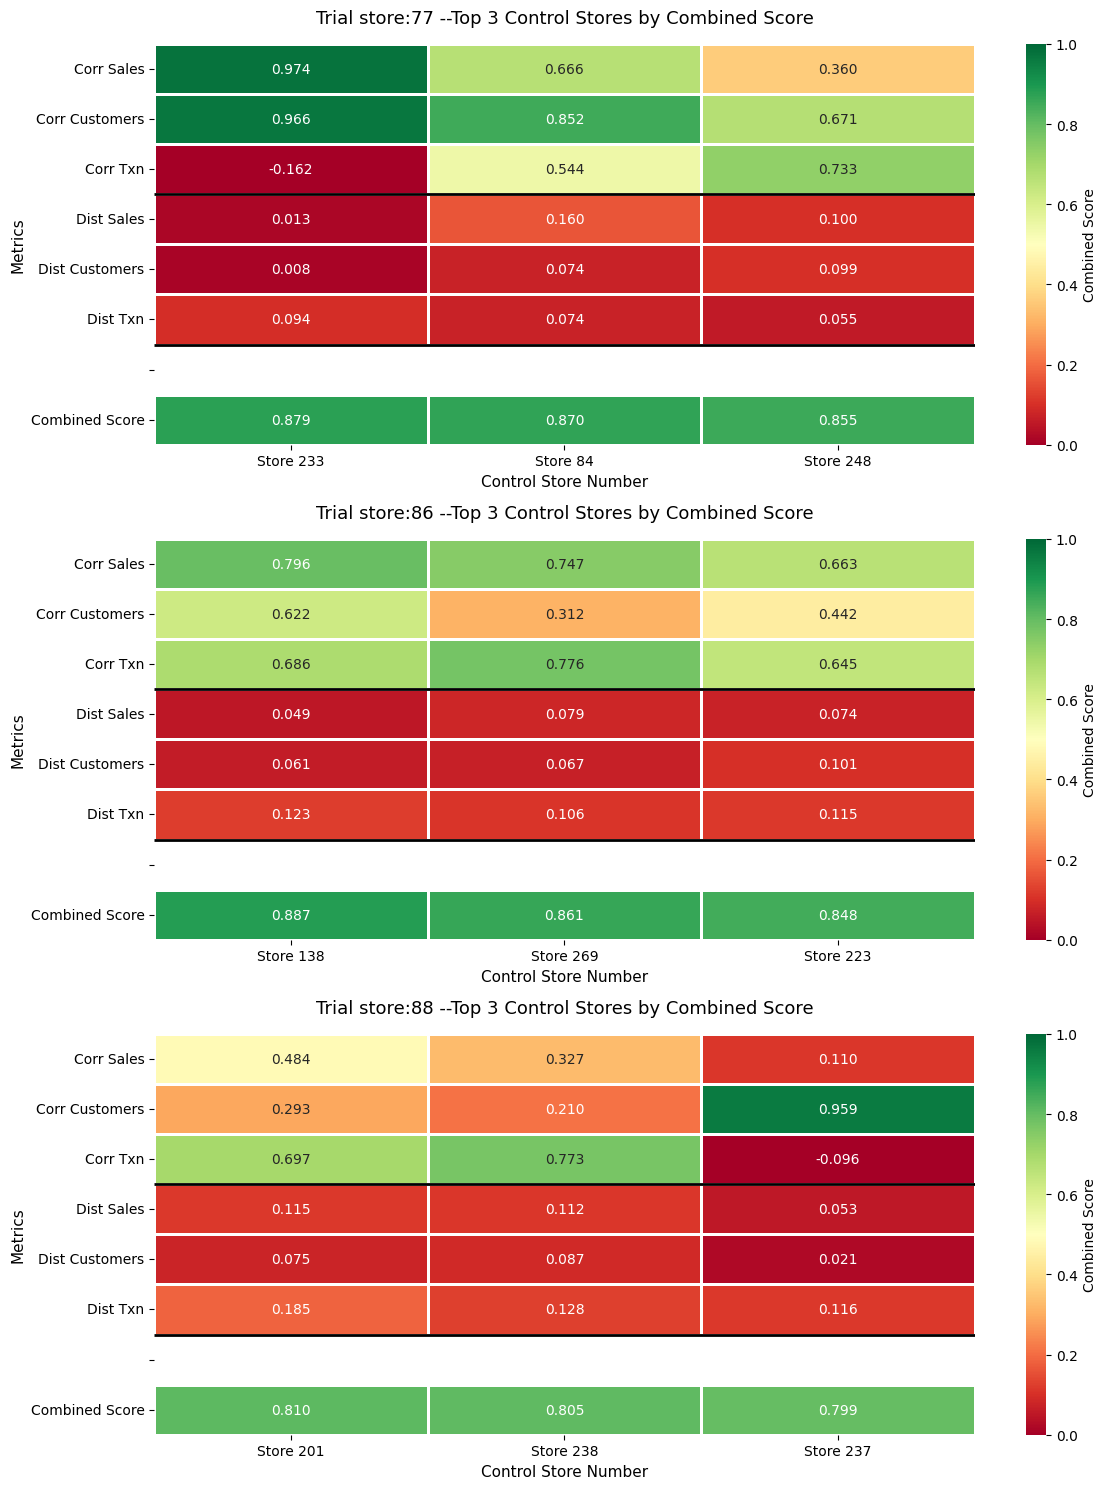

In [38]:
trial_stores=corr_mag_df['TRIAL_STORE'].unique()
fig,axes=plt.subplots(len(trial_stores),1,figsize=(12, 5*len(trial_stores)))

for idx,trial_store in enumerate(trial_stores):
    trial1_data=corr_mag_df[corr_mag_df['TRIAL_STORE']==trial_store].copy()
    top_stores=trial1_data.nlargest(3,'combined_score')

    heatmap_data=top_stores[['corr_sales','corr_customers','corr_txn','dist_sales','dist_customers','dist_txn']].T
    heatmap_data.columns=[f"Store {int(x)}" for x in top_stores['CONTROL_STORE']]
    heatmap_data.index=['Corr Sales','Corr Customers','Corr Txn','Dist Sales',
                        'Dist Customers','Dist Txn']
    
    spacer_row=pd.DataFrame([[np.nan]*len(heatmap_data.columns)],
                            columns=heatmap_data.columns,
                            index=[''])
    
    # Add combined score as a row
    combined_row=pd.DataFrame([top_stores['combined_score'].values],
                            columns=heatmap_data.columns,
                            index=['Combined Score'])
    
    heatmap_data=pd.concat([heatmap_data,spacer_row,combined_row])

    # creating a mask for spacer row
    mask=pd.DataFrame(False, index=heatmap_data.index,columns=heatmap_data.columns)
    mask.loc['']=True

    # Create heatmap
    ax=axes[idx]
    sns.heatmap(heatmap_data,annot=True, fmt='.3f',cmap='RdYlGn', vmin=0, vmax=1,
                cbar_kws={'label':'Combined Score'},ax=ax, linewidths=1,linecolor='white',mask=mask)
    
    # Add H0rizontal lines to seperate sections
    ax.hlines([3,6],*ax.get_xlim(),colors='black',linewidth=2)
    ax.set_title(f'Trial store:{trial_store} --Top 3 Control Stores by Combined Score', fontsize=13, pad=15)
    ax.set_ylabel('Metrics', fontsize=11)
    ax.set_xlabel('Control Store Number', fontsize=11)
plt.tight_layout()
plt.show()

    

----

---

#### Checking the pre trial data of store 77 and store 233 to see H0w close it is

In [39]:
store_77=pre_trial_data[pre_trial_data['STORE_NBR']==77][['MONTH_ID','TOTAL_SALES','NUMBER_CUSTOMERS','TOTAL_TRANSACTIONS']]
store_77=store_77.rename(columns={'TOTAL_SALES':'77_TOTAL_SALES','NUMBER_CUSTOMERS':'77_NUMBER_CUSTOMERS','TOTAL_TRANSACTIONS':'77_TOTAL_TRANSACTIONS'})
store_77

,MONTH_ID,77_TOTAL_SALES,77_NUMBER_CUSTOMERS,77_TOTAL_TRANSACTIONS
880,201807,268.4,47,51
881,201808,247.5,46,46
882,201809,216.8,40,42
883,201810,194.3,36,37
884,201811,224.9,39,42
885,201812,255.2,43,45
886,201901,188.4,31,35


In [40]:
store_233=pre_trial_data[pre_trial_data['STORE_NBR']==233][['MONTH_ID','TOTAL_SALES','NUMBER_CUSTOMERS','TOTAL_TRANSACTIONS']]
store_233=store_233.rename(columns={'TOTAL_SALES':'233_TOTAL_SALES','NUMBER_CUSTOMERS':'233_NUMBER_CUSTOMERS','TOTAL_TRANSACTIONS':'233_TOTAL_TRANSACTIONS'})
store_233

,MONTH_ID,233_TOTAL_SALES,233_NUMBER_CUSTOMERS,233_TOTAL_TRANSACTIONS
2695,201807,271.2,47,49
2696,201808,260.7,44,45
2697,201809,220.9,40,43
2698,201810,159.3,32,32
2699,201811,206.5,39,40
2700,201812,265.4,43,45
2701,201901,150.5,31,31


In [41]:
store_77_233=store_77.merge(store_233,on='MONTH_ID',how='inner')
store_77_233['MONTH_ID']=pd.to_datetime(store_77_233['MONTH_ID'],format='%Y%m')
store_77_233

,MONTH_ID,77_TOTAL_SALES,77_NUMBER_CUSTOMERS,77_TOTAL_TRANSACTIONS,233_TOTAL_SALES,233_NUMBER_CUSTOMERS,233_TOTAL_TRANSACTIONS
0,2018-07-01,268.4,47,51,271.2,47,49
1,2018-08-01,247.5,46,46,260.7,44,45
2,2018-09-01,216.8,40,42,220.9,40,43
3,2018-10-01,194.3,36,37,159.3,32,32
4,2018-11-01,224.9,39,42,206.5,39,40
5,2018-12-01,255.2,43,45,265.4,43,45
6,2019-01-01,188.4,31,35,150.5,31,31


Text(0.5, 0.98, 'METRICS COMPARISION OF STORE 77 & STORE 233')

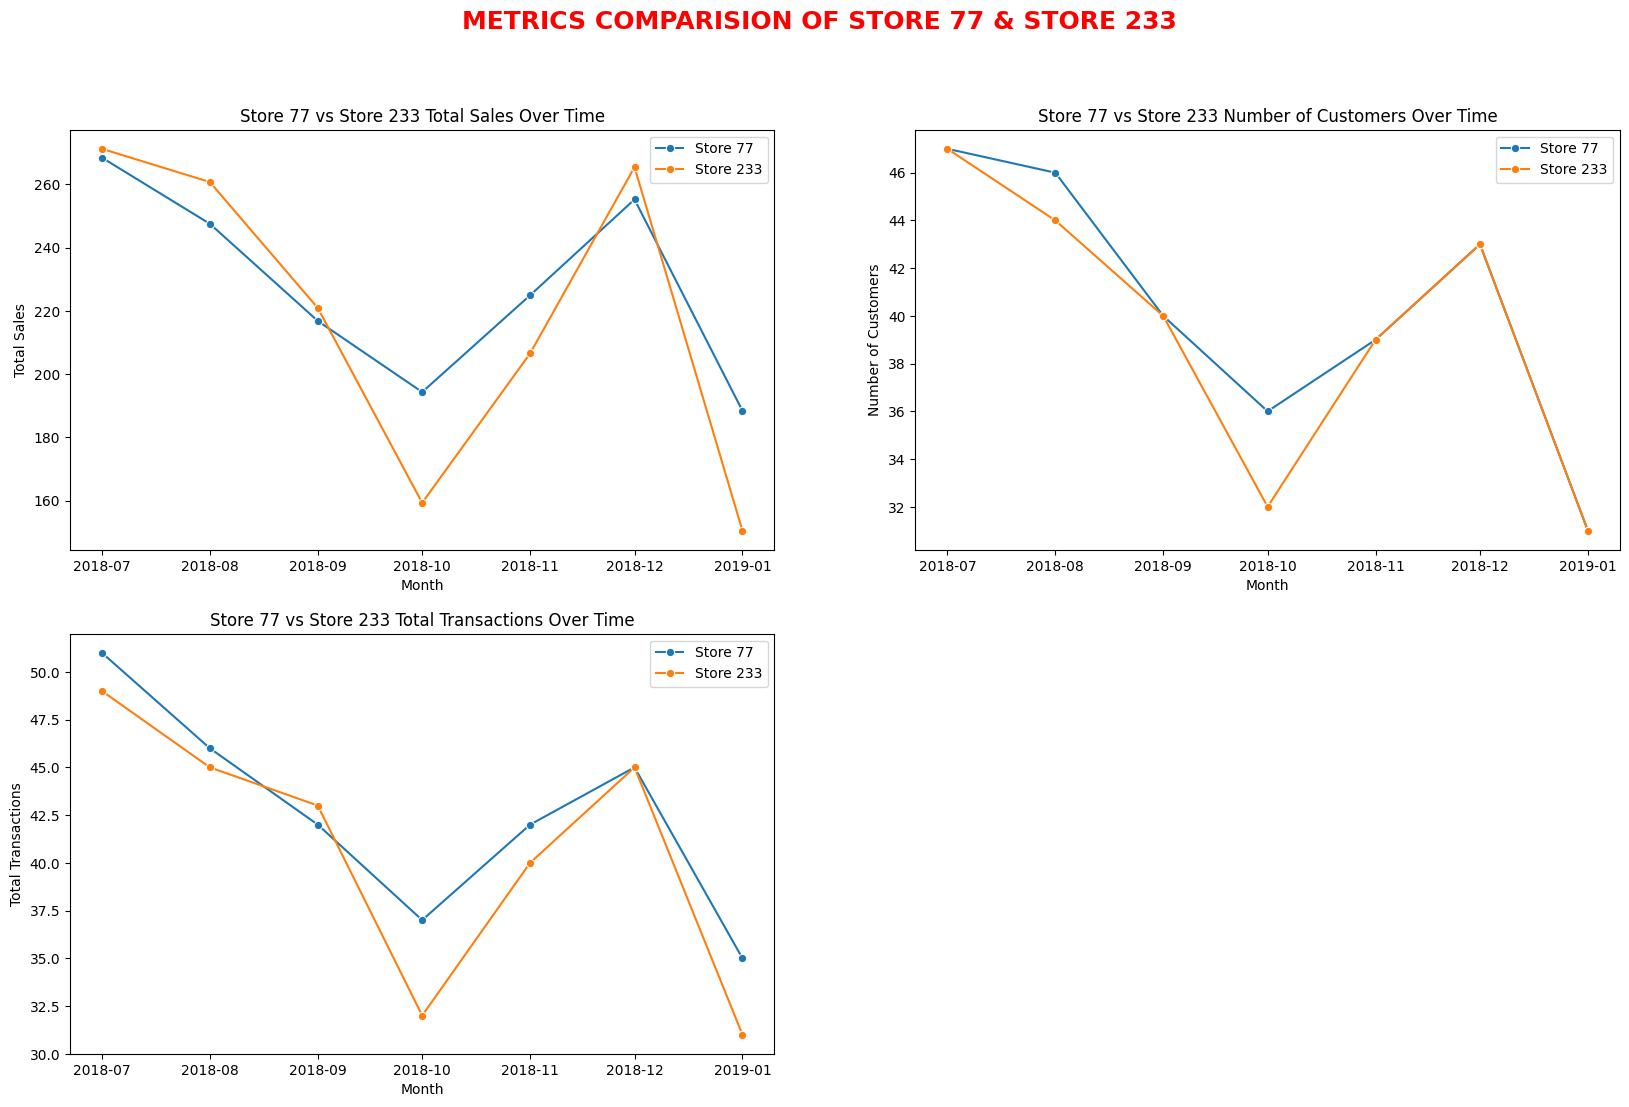

In [42]:
fig, axes=plt.subplots(2,2,figsize=(20,12))
ax=axes.flatten()
sns.lineplot(data=store_77_233, x='MONTH_ID', y='77_TOTAL_SALES', marker='o', label='Store 77',ax=ax[0])
sns.lineplot(data=store_77_233, x='MONTH_ID', y='233_TOTAL_SALES', marker='o', label='Store 233',ax=ax[0])
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Total Sales')
ax[0].set_title('Store 77 vs Store 233 Total Sales Over Time')
ax[0].legend()

sns.lineplot(data=store_77_233, x='MONTH_ID', y='77_NUMBER_CUSTOMERS', marker='o', label='Store 77',ax=ax[1])
sns.lineplot(data=store_77_233, x='MONTH_ID', y='233_NUMBER_CUSTOMERS', marker='o', label='Store 233',ax=ax[1])
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Number of Customers')
ax[1].set_title('Store 77 vs Store 233 Number of Customers Over Time')
ax[1].legend()

sns.lineplot(data=store_77_233, x='MONTH_ID', y='77_TOTAL_TRANSACTIONS', marker='o', label='Store 77',ax=ax[2])
sns.lineplot(data=store_77_233, x='MONTH_ID', y='233_TOTAL_TRANSACTIONS', marker='o', label='Store 233',ax=ax[2])
ax[2].set_xlabel('Month')
ax[2].set_ylabel('Total Transactions')
ax[2].set_title('Store 77 vs Store 233 Total Transactions Over Time')
ax[2].legend()

ax[3].set_visible(False)
plt.suptitle('METRICS COMPARISION OF STORE 77 & STORE 233',fontsize='18',fontweight='bold',color='red')





---

#### Checking the pre trial data of store 86 and store 138 to see H0w close it is

In [43]:
store_86=pre_trial_data[pre_trial_data['STORE_NBR']==86][['MONTH_ID','TOTAL_SALES','NUMBER_CUSTOMERS','TOTAL_TRANSACTIONS']]
store_86=store_86.rename(columns={'TOTAL_SALES':'86_TOTAL_SALES','NUMBER_CUSTOMERS':'86_NUMBER_CUSTOMERS','TOTAL_TRANSACTIONS':'86_TOTAL_TRANSACTIONS'})
store_86

,MONTH_ID,86_TOTAL_SALES,86_NUMBER_CUSTOMERS,86_TOTAL_TRANSACTIONS
977,201807,851.00,94,120
978,201808,726.85,92,106
979,201809,855.00,100,121
980,201810,898.80,105,130
981,201811,851.20,95,119
982,201812,812.20,93,115
983,201901,800.60,89,121


In [44]:
store_138=pre_trial_data[pre_trial_data['STORE_NBR']==138][['MONTH_ID','TOTAL_SALES','NUMBER_CUSTOMERS','TOTAL_TRANSACTIONS']]
store_138=store_138.rename(columns={'TOTAL_SALES':'138_TOTAL_SALES','NUMBER_CUSTOMERS':'138_NUMBER_CUSTOMERS','TOTAL_TRANSACTIONS':'138_TOTAL_TRANSACTIONS'})
store_138

,MONTH_ID,138_TOTAL_SALES,138_NUMBER_CUSTOMERS,138_TOTAL_TRANSACTIONS
1588,201807,778.2,87,114
1589,201808,660.3,81,98
1590,201809,869.8,108,126
1591,201810,910.8,103,130
1592,201811,906.4,101,131
1593,201812,806.4,97,115
1594,201901,880.0,95,124


In [45]:
store_86_138=store_86.merge(store_138,on='MONTH_ID',how='inner')
store_86_138['MONTH_ID']=pd.to_datetime(store_86_138['MONTH_ID'],format='%Y%m')
store_86_138

,MONTH_ID,86_TOTAL_SALES,86_NUMBER_CUSTOMERS,86_TOTAL_TRANSACTIONS,138_TOTAL_SALES,138_NUMBER_CUSTOMERS,138_TOTAL_TRANSACTIONS
0,2018-07-01,851.00,94,120,778.2,87,114
1,2018-08-01,726.85,92,106,660.3,81,98
2,2018-09-01,855.00,100,121,869.8,108,126
3,2018-10-01,898.80,105,130,910.8,103,130
4,2018-11-01,851.20,95,119,906.4,101,131
5,2018-12-01,812.20,93,115,806.4,97,115
6,2019-01-01,800.60,89,121,880.0,95,124


Text(0.5, 0.98, 'METRICS COMPARISION OF STORE 86 & STORE 138')

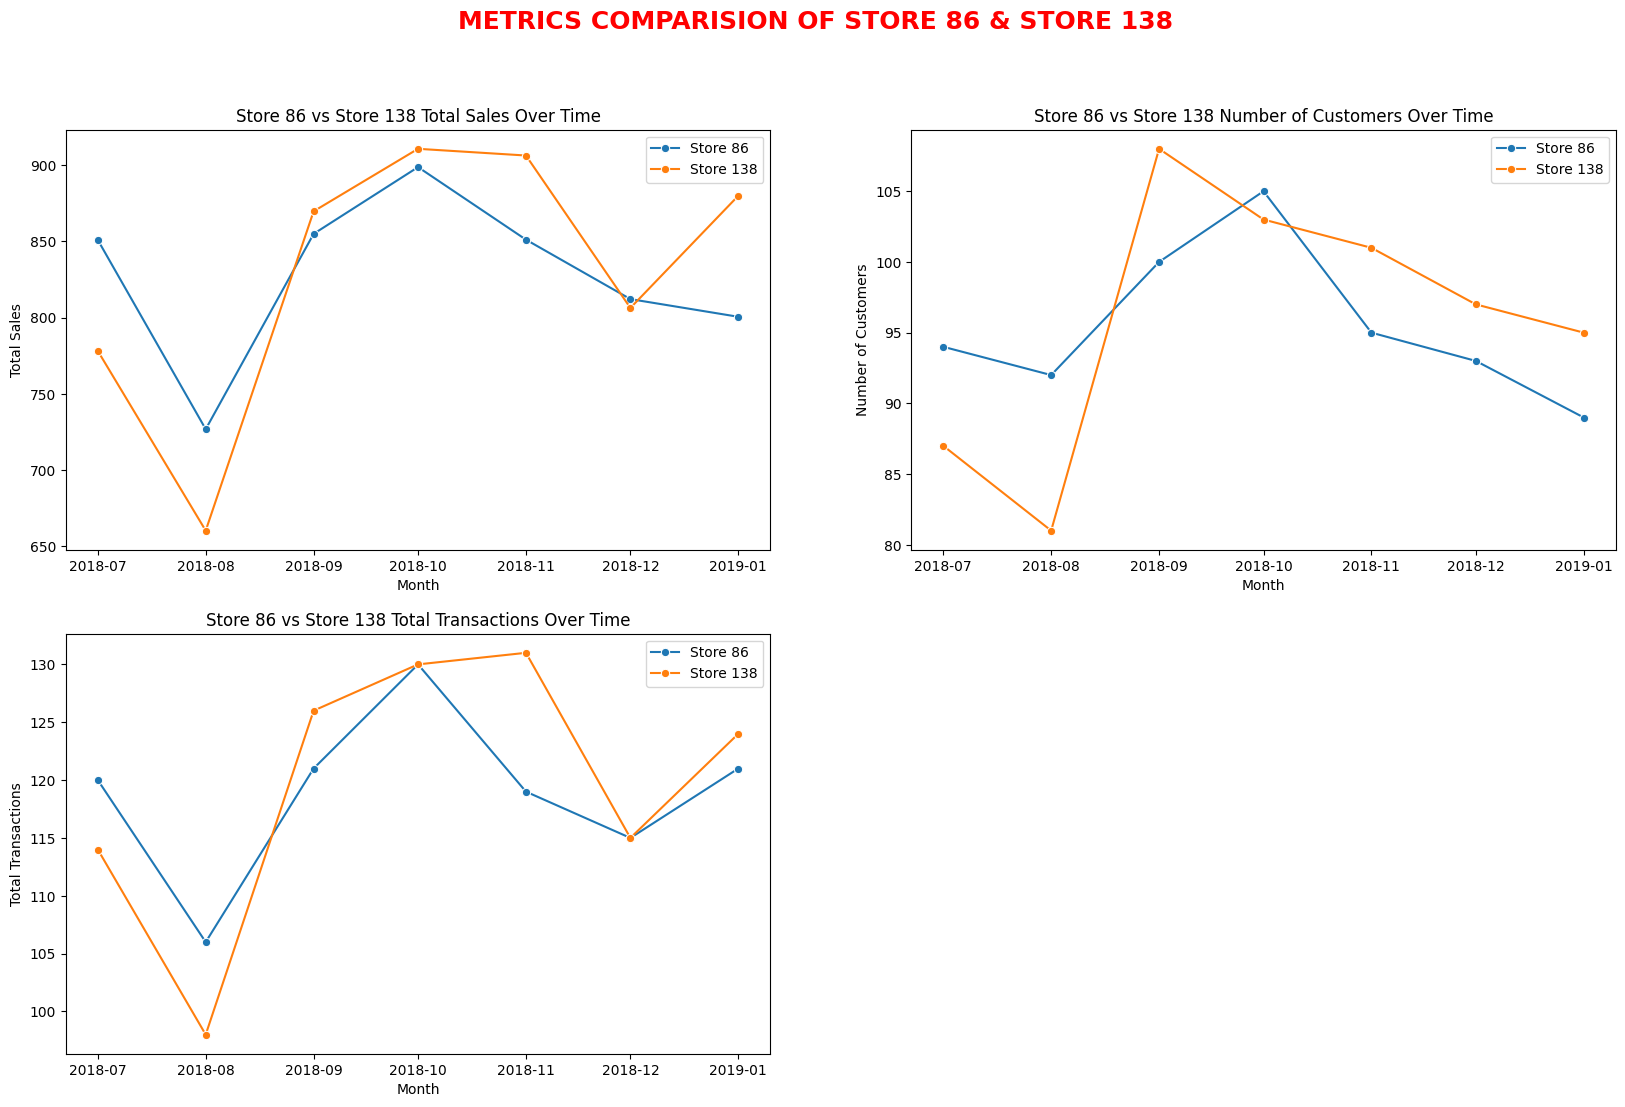

In [46]:
fig, axes=plt.subplots(2,2,figsize=(20,12))
ax=axes.flatten()
sns.lineplot(data=store_86_138, x='MONTH_ID', y='86_TOTAL_SALES', marker='o', label='Store 86',ax=ax[0])
sns.lineplot(data=store_86_138, x='MONTH_ID', y='138_TOTAL_SALES', marker='o', label='Store 138',ax=ax[0])
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Total Sales')
ax[0].set_title('Store 86 vs Store 138 Total Sales Over Time')
ax[0].legend()

sns.lineplot(data=store_86_138, x='MONTH_ID', y='86_NUMBER_CUSTOMERS', marker='o', label='Store 86',ax=ax[1])
sns.lineplot(data=store_86_138, x='MONTH_ID', y='138_NUMBER_CUSTOMERS', marker='o', label='Store 138',ax=ax[1])
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Number of Customers')
ax[1].set_title('Store 86 vs Store 138 Number of Customers Over Time')
ax[1].legend()

sns.lineplot(data=store_86_138, x='MONTH_ID', y='86_TOTAL_TRANSACTIONS', marker='o', label='Store 86',ax=ax[2])
sns.lineplot(data=store_86_138, x='MONTH_ID', y='138_TOTAL_TRANSACTIONS', marker='o', label='Store 138',ax=ax[2])
ax[2].set_xlabel('Month')
ax[2].set_ylabel('Total Transactions')
ax[2].set_title('Store 86 vs Store 138 Total Transactions Over Time')
ax[2].legend()

ax[3].set_visible(False)
plt.suptitle('METRICS COMPARISION OF STORE 86 & STORE 138',fontsize='18',fontweight='bold',color='red')





---

#### Checking the pre trial data of store 88 and store 201 to see H0w close it is

In [47]:
store_88=pre_trial_data[pre_trial_data['STORE_NBR']==88][['MONTH_ID','TOTAL_SALES','NUMBER_CUSTOMERS','TOTAL_TRANSACTIONS']]
store_88=store_88.rename(columns={'TOTAL_SALES':'88_TOTAL_SALES','NUMBER_CUSTOMERS':'88_NUMBER_CUSTOMERS','TOTAL_TRANSACTIONS':'88_TOTAL_TRANSACTIONS'})
store_88


,MONTH_ID,88_TOTAL_SALES,88_NUMBER_CUSTOMERS,88_TOTAL_TRANSACTIONS
1001,201807,1218.2,124,144
1002,201808,1242.2,125,152
1003,201809,1361.8,121,153
1004,201810,1270.8,120,150
1005,201811,1311.4,123,150
1006,201812,1213.0,120,138
1007,201901,1215.4,115,141


In [48]:
store_201=pre_trial_data[pre_trial_data['STORE_NBR']==201][['MONTH_ID','TOTAL_SALES','NUMBER_CUSTOMERS','TOTAL_TRANSACTIONS']]
store_201=store_201.rename(columns={'TOTAL_SALES':'201_TOTAL_SALES','NUMBER_CUSTOMERS':'201_NUMBER_CUSTOMERS','TOTAL_TRANSACTIONS':'201_TOTAL_TRANSACTIONS'})
store_201

,MONTH_ID,201_TOTAL_SALES,201_NUMBER_CUSTOMERS,201_TOTAL_TRANSACTIONS
2334,201807,1046.0,115,122
2335,201808,1057.7,107,126
2336,201809,1099.0,103,127
2337,201810,1142.6,117,134
2338,201811,1208.1,124,137
2339,201812,1110.7,113,128
2340,201901,1082.5,106,125


In [49]:
store_88_201=store_88.merge(store_201,on='MONTH_ID',how='inner')
store_88_201['MONTH_ID']=pd.to_datetime(store_88_201['MONTH_ID'],format='%Y%m')
store_88_201

,MONTH_ID,88_TOTAL_SALES,88_NUMBER_CUSTOMERS,88_TOTAL_TRANSACTIONS,201_TOTAL_SALES,201_NUMBER_CUSTOMERS,201_TOTAL_TRANSACTIONS
0,2018-07-01,1218.2,124,144,1046.0,115,122
1,2018-08-01,1242.2,125,152,1057.7,107,126
2,2018-09-01,1361.8,121,153,1099.0,103,127
3,2018-10-01,1270.8,120,150,1142.6,117,134
4,2018-11-01,1311.4,123,150,1208.1,124,137
5,2018-12-01,1213.0,120,138,1110.7,113,128
6,2019-01-01,1215.4,115,141,1082.5,106,125


Text(0.5, 0.98, 'METRICS COMPARISION OF STORE 88 & STORE 201')

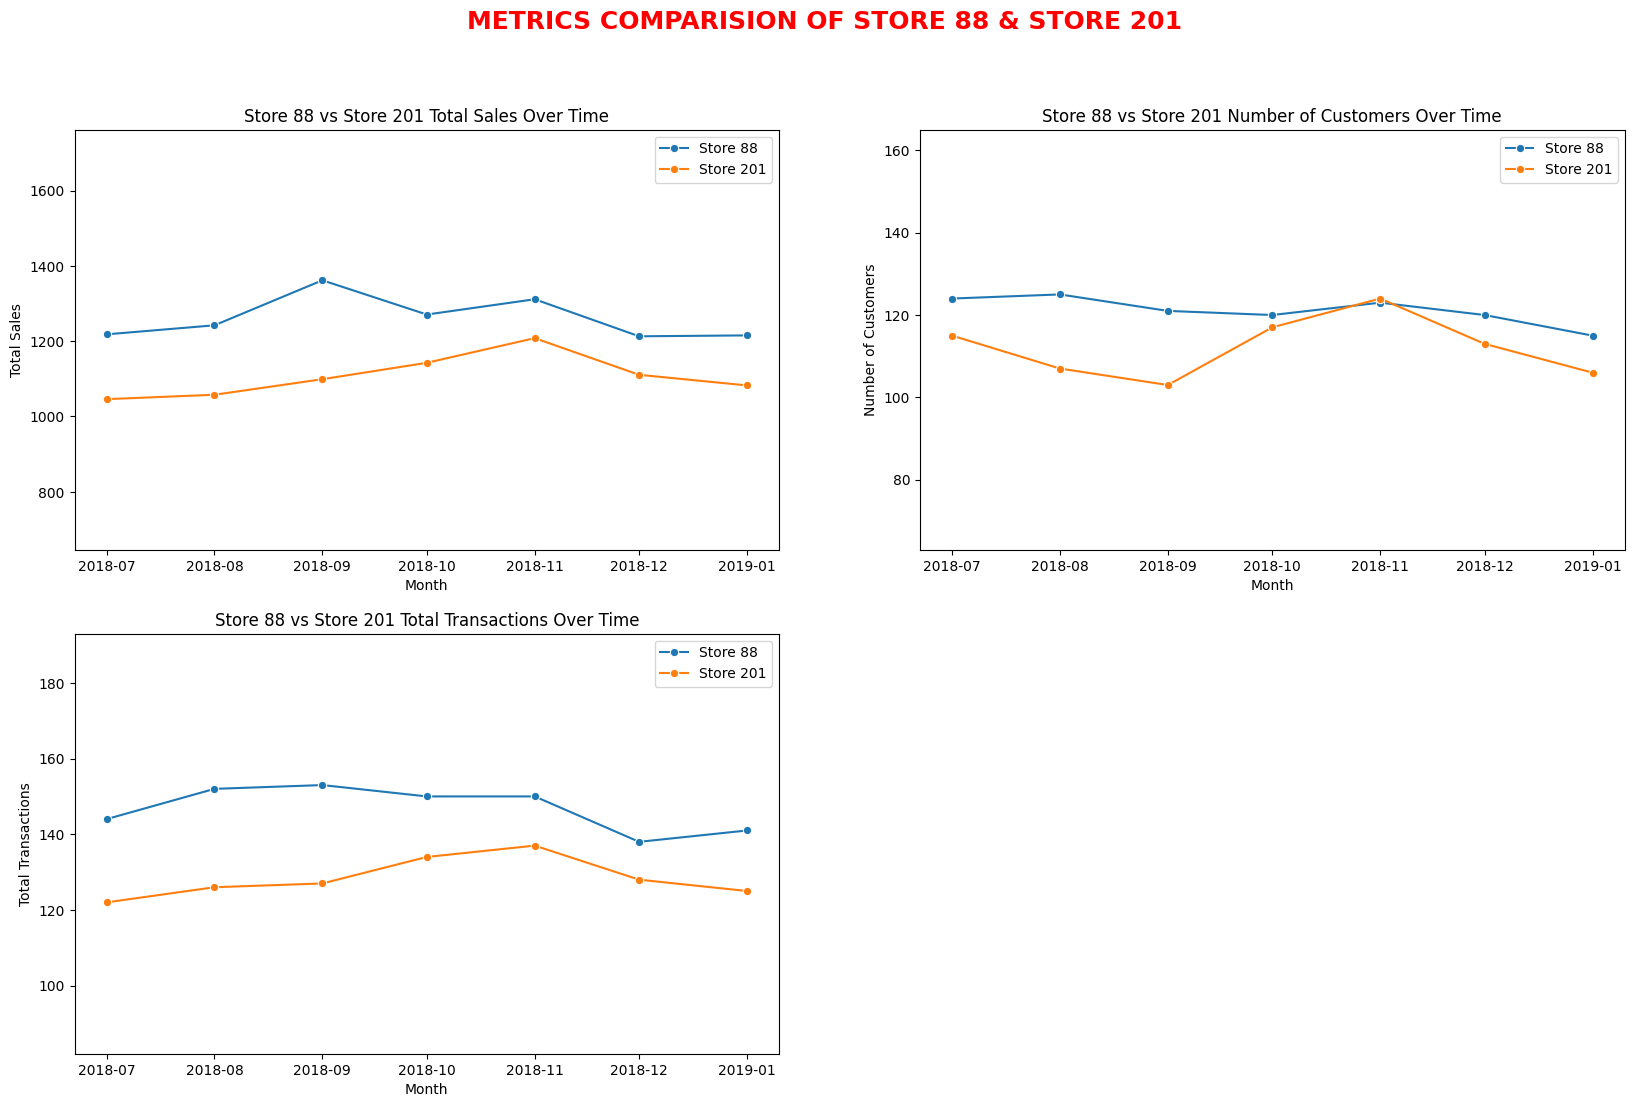

In [50]:
fig, axes=plt.subplots(2,2,figsize=(20,12))
ax=axes.flatten()
sns.lineplot(data=store_88_201, x='MONTH_ID', y='88_TOTAL_SALES', marker='o', label='Store 88',ax=ax[0])
sns.lineplot(data=store_88_201, x='MONTH_ID', y='201_TOTAL_SALES', marker='o', label='Store 201',ax=ax[0])
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Total Sales')
ax[0].set_title('Store 88 vs Store 201 Total Sales Over Time')
ax[0].legend()
sales_min = min(store_88_201['88_TOTAL_SALES'].min(), store_88_201['201_TOTAL_SALES'].min())
sales_max = max(store_88_201['88_TOTAL_SALES'].max(), store_88_201['201_TOTAL_SALES'].max())
ax[0].set_ylim(sales_min - 400, sales_max + 400)

sns.lineplot(data=store_88_201, x='MONTH_ID', y='88_NUMBER_CUSTOMERS', marker='o', label='Store 88',ax=ax[1])
sns.lineplot(data=store_88_201, x='MONTH_ID', y='201_NUMBER_CUSTOMERS', marker='o', label='Store 201',ax=ax[1])
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Number of Customers')
ax[1].set_title('Store 88 vs Store 201 Number of Customers Over Time')
ax[1].legend()
customers_min = min(store_88_201['88_NUMBER_CUSTOMERS'].min(), store_88_201['201_NUMBER_CUSTOMERS'].min())
customers_max = max(store_88_201['88_NUMBER_CUSTOMERS'].max(), store_88_201['201_NUMBER_CUSTOMERS'].max())
ax[1].set_ylim(customers_min - 40, customers_max + 40)

sns.lineplot(data=store_88_201, x='MONTH_ID', y='88_TOTAL_TRANSACTIONS', marker='o', label='Store 88',ax=ax[2])
sns.lineplot(data=store_88_201, x='MONTH_ID', y='201_TOTAL_TRANSACTIONS', marker='o', label='Store 201',ax=ax[2])
ax[2].set_xlabel('Month')
ax[2].set_ylabel('Total Transactions')
ax[2].set_title('Store 88 vs Store 201 Total Transactions Over Time')
ax[2].legend()
txn_min = min(store_88_201['88_TOTAL_TRANSACTIONS'].min(), store_88_201['201_TOTAL_TRANSACTIONS'].min())
txn_max = max(store_88_201['88_TOTAL_TRANSACTIONS'].max(), store_88_201['201_TOTAL_TRANSACTIONS'].max())
ax[2].set_ylim(txn_min - 40, txn_max + 40)

ax[3].set_visible(False)
plt.suptitle('METRICS COMPARISION OF STORE 88 & STORE 201',fontsize='18',fontweight='bold',color='red')





---

Conclusion: 
Visually all three control stores, decided by the combined store seems to be accurate.


---

---

### Checking if the total sales, Number of Customers and Total Transactions Over time have increased in the trial store or not 


Null Hypothesis: In trial period all the metrics of trial store will be similar to that of control stores. <br>
Alternative Hypothesis: In Trial period, trial stores metrics will be greater than that of  pre trial period.

---

<center> STORE 77 AND 233 </center>

In [51]:
store_77_trial=trial_data[trial_data['STORE_NBR']==77][['MONTH_ID','TOTAL_SALES','NUMBER_CUSTOMERS','TOTAL_TRANSACTIONS']]
store_77_trial=store_77_trial.rename(columns={'TOTAL_SALES':'77_TOTAL_SALES','NUMBER_CUSTOMERS':'77_NUMBER_CUSTOMERS','TOTAL_TRANSACTIONS':'77_TOTAL_TRANSACTIONS'})
store_77_trial

,MONTH_ID,77_TOTAL_SALES,77_NUMBER_CUSTOMERS,77_TOTAL_TRANSACTIONS
887,201902,211.6,40,40
888,201903,255.1,46,51
889,201904,258.1,47,47


In [52]:
store_233_trial=trial_data[trial_data['STORE_NBR']==233][['MONTH_ID','TOTAL_SALES','NUMBER_CUSTOMERS','TOTAL_TRANSACTIONS']]
store_233_trial=store_233_trial.rename(columns={'TOTAL_SALES':'233_TOTAL_SALES','NUMBER_CUSTOMERS':'233_NUMBER_CUSTOMERS','TOTAL_TRANSACTIONS':'233_TOTAL_TRANSACTIONS'})
store_233_trial

,MONTH_ID,233_TOTAL_SALES,233_NUMBER_CUSTOMERS,233_TOTAL_TRANSACTIONS
2702,201902,220.7,42,43
2703,201903,180.6,35,36
2704,201904,144.2,27,29


In [53]:
store_77_233_trial=store_77_trial.merge(store_233_trial,on='MONTH_ID',how='inner')
store_77_233_trial['MONTH_ID']=pd.to_datetime(store_77_233_trial['MONTH_ID'],format='%Y%m')
store_77_233_trial

,MONTH_ID,77_TOTAL_SALES,77_NUMBER_CUSTOMERS,77_TOTAL_TRANSACTIONS,233_TOTAL_SALES,233_NUMBER_CUSTOMERS,233_TOTAL_TRANSACTIONS
0,2019-02-01,211.6,40,40,220.7,42,43
1,2019-03-01,255.1,46,51,180.6,35,36
2,2019-04-01,258.1,47,47,144.2,27,29


Text(0.5, 0.98, 'METRICS COMPARISION OF STORE 77 & STORE 233 (Trial Period Data)')

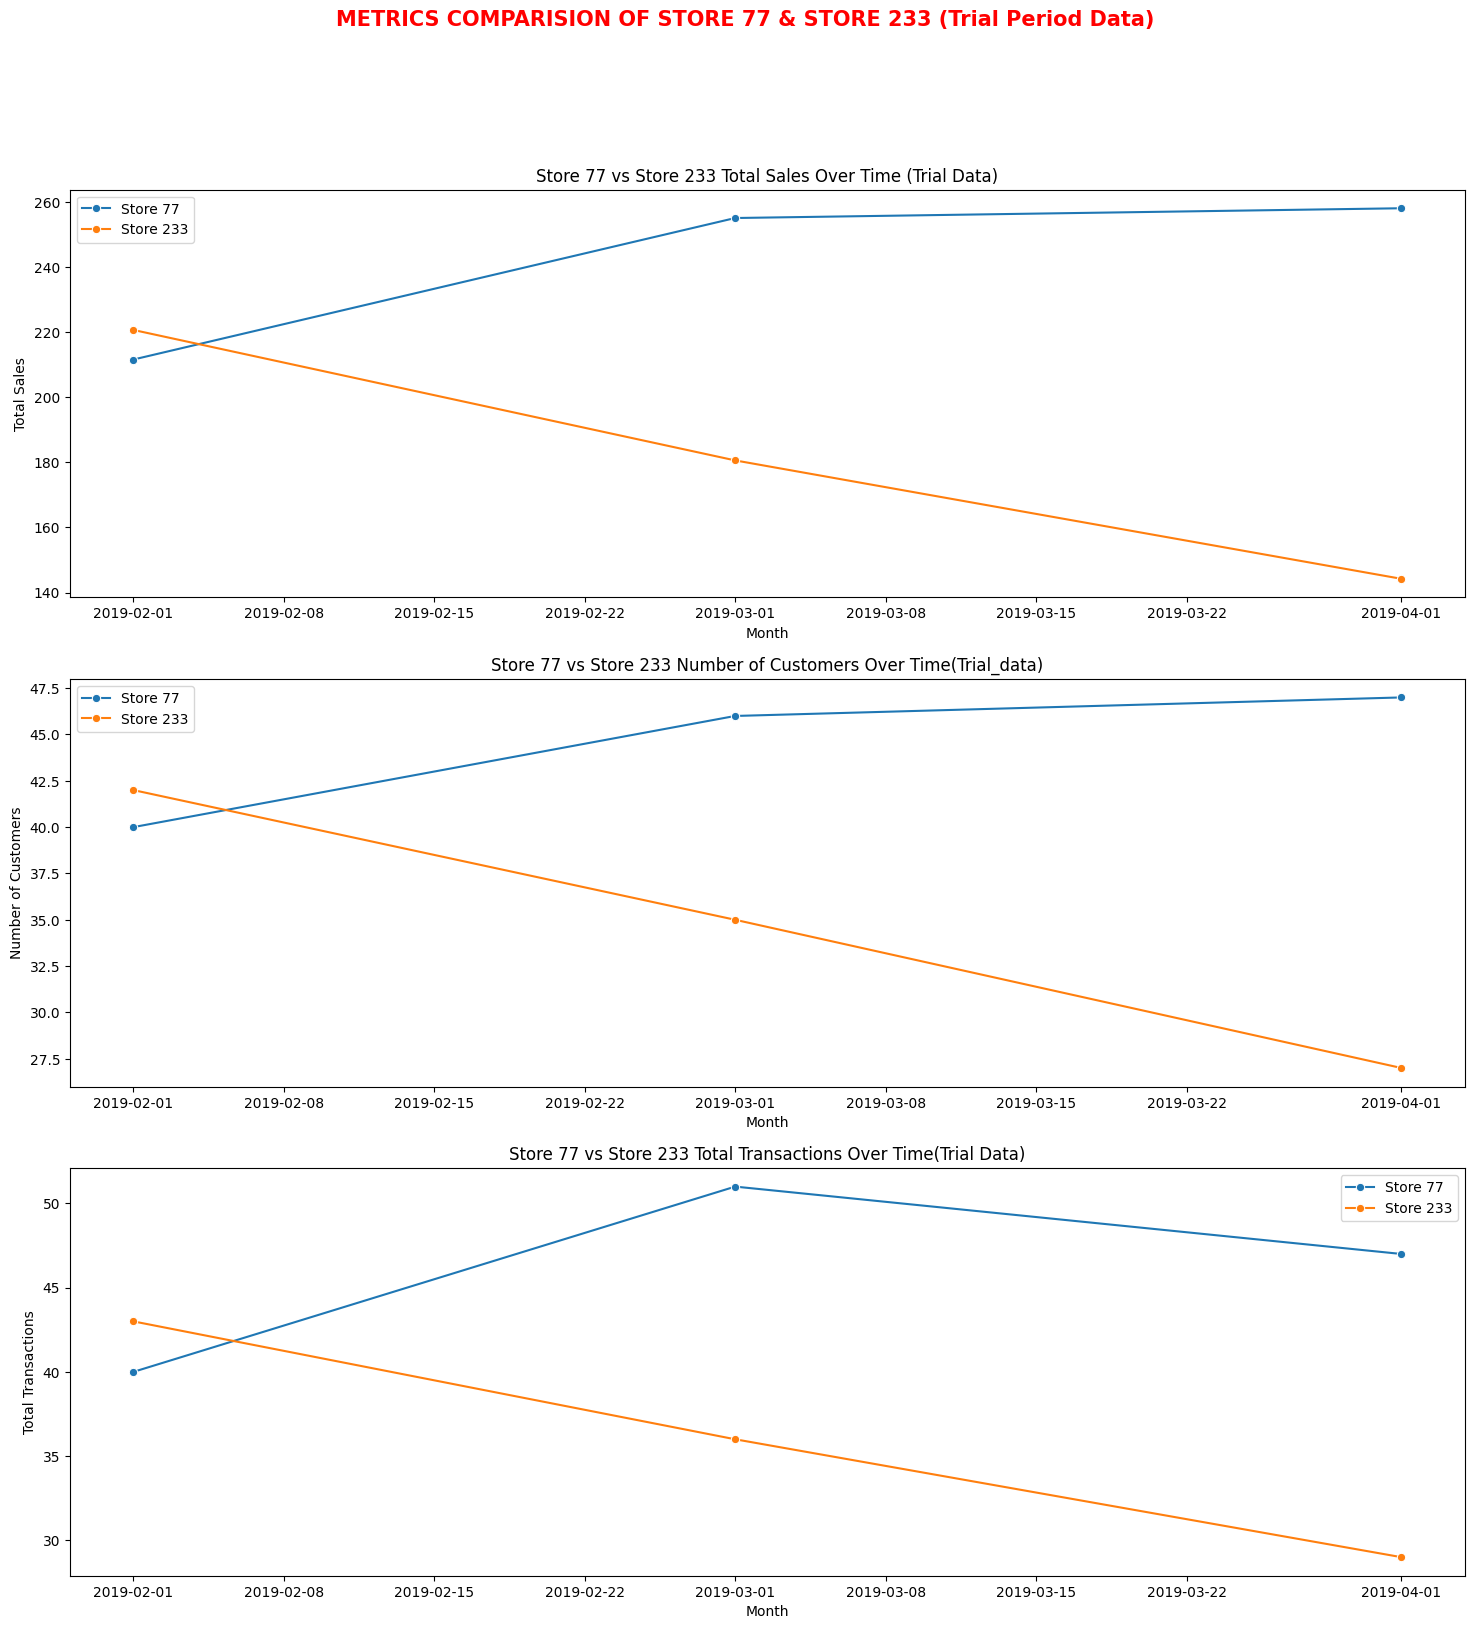

In [68]:
fig, axes=plt.subplots(3,1,figsize=(18,18))
ax=axes.flatten()
sns.lineplot(data=store_77_233_trial, x='MONTH_ID', y='77_TOTAL_SALES', marker='o', label='Store 77',ax=ax[0])
sns.lineplot(data=store_77_233_trial, x='MONTH_ID', y='233_TOTAL_SALES', marker='o', label='Store 233',ax=ax[0])
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Total Sales')
ax[0].set_title('Store 77 vs Store 233 Total Sales Over Time (Trial Data)')
ax[0].legend()

sns.lineplot(data=store_77_233_trial, x='MONTH_ID', y='77_NUMBER_CUSTOMERS', marker='o', label='Store 77',ax=ax[1])
sns.lineplot(data=store_77_233_trial, x='MONTH_ID', y='233_NUMBER_CUSTOMERS', marker='o', label='Store 233',ax=ax[1])
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Number of Customers')
ax[1].set_title('Store 77 vs Store 233 Number of Customers Over Time(Trial_data)')
ax[1].legend()

sns.lineplot(data=store_77_233_trial, x='MONTH_ID', y='77_TOTAL_TRANSACTIONS', marker='o', label='Store 77',ax=ax[2])
sns.lineplot(data=store_77_233_trial, x='MONTH_ID', y='233_TOTAL_TRANSACTIONS', marker='o', label='Store 233',ax=ax[2])
ax[2].set_xlabel('Month')
ax[2].set_ylabel('Total Transactions')
ax[2].set_title('Store 77 vs Store 233 Total Transactions Over Time(Trial Data)')
ax[2].legend()


plt.suptitle('METRICS COMPARISION OF STORE 77 & STORE 233 (Trial Period Data)',fontsize='15',fontweight='bold',color='red')





Visually the new format seem to work.


Lets back this visualization statistically


In [55]:
from scipy import stats

In [56]:
print("="*100)
print("HYPOTHESIS TEST: STORE 77 (TRIAL) Vs STORE 233 (CONTROL)")
print("="*100)
print("\n Null Hypothesis(H0)): Trial store metric = Control store metric in Trial period")
print("\n Alternative Hypothesis(H1): Trial store metrics > Control store metric in Trial Period")
print("\n")
store_77_trial=trial_data[trial_data['STORE_NBR']==77][['MONTH_ID','TOTAL_SALES','NUMBER_CUSTOMERS','TOTAL_TRANSACTIONS']]
store_233_trial=trial_data[trial_data['STORE_NBR']==233][['MONTH_ID','TOTAL_SALES','NUMBER_CUSTOMERS','TOTAL_TRANSACTIONS']]

# One tailed Independent Samples T test
print("\n One-TAILED INDEPENDENT SAMPLES T-TEST")
#because h1 says "greater than", not just different
print("="*100)

#Test 1: Total SALES
t_stat_sales, p_value_sales_two=stats.ttest_ind(store_77_trial['TOTAL_SALES'],
                                                store_233_trial['TOTAL_SALES'])
p_value_sales=p_value_sales_two/2 if t_stat_sales >0 else 1 - (p_value_sales_two/2)
print(f"\n1. TOTAL SALES")
print(f"Store 77 {((store_77_trial['TOTAL_SALES'].mean()/store_233_trial['TOTAL_SALES'].mean()-1)*100):+.2f}% vs Store 233")
print(f"T_statistic:{t_stat_sales:.4f}")
print(f"p_value(one-tailed):{p_value_sales:.4f}")
if t_stat_sales > 0 and p_value_sales <0.05:
    print(f"Reject H0: Store 77 sales are significantly greater than store 233(p<0.05)")
elif t_stat_sales > 0:
    print(f"Fail to Reject H0: Store 77 sales sales are higher but Not significantly (p >=0.05)")
else:
    print(f"Fail to Reject H0: Store 77 sales are Lower than store 233")

# Test 2: Number Of Customers
t_stat_cust, p_value_cust_two=stats.ttest_ind(store_77_trial['NUMBER_CUSTOMERS'],
                                                store_233_trial['NUMBER_CUSTOMERS'])
p_value_cust= p_value_cust_two/ 2 if t_stat_cust > 0 else 1 - (p_value_cust_two/2)

print(f"\n2. NUMBER OF CUSTOMERS:")
print(f"Store 77{((store_77_trial['NUMBER_CUSTOMERS'].mean()/store_233_trial['NUMBER_CUSTOMERS'].mean()-1)*100):+.2f}% vs Store 233")
print(f"t-statistic:{t_stat_cust:.4f}")
print(f"p-value(one-tailed): {p_value_cust:.4f}")
if t_stat_cust > 0 and p_value_cust < 0.05:
    print(f" REJECT H0: Store 77 customers are Significantly Greater than store 233")
elif t_stat_cust > 0:
    print(f"Fail to Reject H0: Store 77 customers are higher but not significantly (p>=0.05)")
else:
    print(f"Fail to Reject H0: Store 77 customers are Lower than store 233")
    
#Test 3: Total_Transactions
t_stat_trans, p_value_trans_two=stats.ttest_ind(store_77_trial['TOTAL_TRANSACTIONS'],
                                            store_233_trial['TOTAL_TRANSACTIONS'])
p_value_trans=p_value_trans_two/2 if t_stat_trans > 0 else 1 - (p_value_trans_two/2)

print(f"\n3. Total Transactions")
print(f"Store 77 is {((store_77_trial['TOTAL_TRANSACTIONS'].mean()/store_233_trial['TOTAL_TRANSACTIONS'].mean()-1)*100):+.2f}% vs Store 233")
print(f"t_statistic:{t_stat_trans:.4f}")
print(f"p_value (one_tailed):{p_value_trans:.4f}")
if t_stat_trans > 0 and p_value_trans < 0.05:
    print(f"Reject H0: Store 77 transactions are SIGNIFICANTLY GREATER than Store 233 (p < 0.05)")
elif t_stat_trans > 0:
    print(f"Fail to Reject H0: Store 77 transactions are higher but NOT significantly (p >=0.05)")
else:
    print(f"Fail to Reject H0: Store 77 trnasactions are Lower than store 233")



HYPOTHESIS TEST: STORE 77 (TRIAL) Vs STORE 233 (CONTROL)

 Null Hypothesis(H0)): Trial store metric = Control store metric in Trial period

 Alternative Hypothesis(H1): Trial store metrics > Control store metric in Trial Period



 One-TAILED INDEPENDENT SAMPLES T-TEST

1. TOTAL SALES
Store 77 +32.87% vs Store 233
T_statistic:2.2370
p_value(one-tailed):0.0445
Reject H0: Store 77 sales are significantly greater than store 233(p<0.05)

2. NUMBER OF CUSTOMERS:
Store 77+27.88% vs Store 233
t-statistic:1.9917
p-value(one-tailed): 0.0586
Fail to Reject H0: Store 77 customers are higher but not significantly (p>=0.05)

3. Total Transactions
Store 77 is +27.78% vs Store 233
t_statistic:1.9365
p_value (one_tailed):0.0624
Fail to Reject H0: Store 77 transactions are higher but NOT significantly (p >=0.05)


#### OVERALL CONCLUSION: <br>

The new store layout was successful in increasing sales. Store 77 performed significantly better than its control store (Store 233) in terms of sales during the trial period. However, the increase in customer count and transactions, while positive, were not statistically significant at the ⍺=0.05 level.

<br>

Business Interpretation:
* The layout change worked- it drove higher sales.
* The higher sales might be due to:
    1. Store layout pursading customer to buy more things and spend more.
    1. Slightly more customers(Make sense as layout won't increase the customers by itself)
    1. Better product placement leading to higher-value purchases.

<br>

Recommendation:
Implement the new layout based on the significant sales increase. The fact that customers and transactions showed positive trends (even if not statistically significant) is also encouraging and suggests the layout had an overall positive impact. 

---

<center> Store 86 vs Store 138 </center>

In [57]:
store_86_trial=trial_data[trial_data['STORE_NBR']==86][['MONTH_ID','TOTAL_SALES','NUMBER_CUSTOMERS','TOTAL_TRANSACTIONS']]
store_86_trial=store_86_trial.rename(columns={'TOTAL_SALES':'86_TOTAL_SALES','NUMBER_CUSTOMERS':'86_NUMBER_CUSTOMERS','TOTAL_TRANSACTIONS':'86_TOTAL_TRANSACTIONS'})
store_86_trial

,MONTH_ID,86_TOTAL_SALES,86_NUMBER_CUSTOMERS,86_TOTAL_TRANSACTIONS
984,201902,872.8,105,131
985,201903,945.4,108,128
986,201904,804.0,99,120


In [58]:
store_138_trial=trial_data[trial_data['STORE_NBR']==138][['MONTH_ID','TOTAL_SALES','NUMBER_CUSTOMERS','TOTAL_TRANSACTIONS']]
store_138_trial=store_138_trial.rename(columns={'TOTAL_SALES':'138_TOTAL_SALES','NUMBER_CUSTOMERS':'138_NUMBER_CUSTOMERS','TOTAL_TRANSACTIONS':'138_TOTAL_TRANSACTIONS'})
store_138_trial

,MONTH_ID,138_TOTAL_SALES,138_NUMBER_CUSTOMERS,138_TOTAL_TRANSACTIONS
1595,201902,683.8,83,103
1596,201903,888.8,102,131
1597,201904,776.6,100,119


In [59]:
store_86_138_trial=store_86_trial.merge(store_138_trial,on='MONTH_ID',how='inner')
store_86_138_trial['MONTH_ID']=pd.to_datetime(store_86_138_trial['MONTH_ID'],format='%Y%m')
store_86_138_trial

,MONTH_ID,86_TOTAL_SALES,86_NUMBER_CUSTOMERS,86_TOTAL_TRANSACTIONS,138_TOTAL_SALES,138_NUMBER_CUSTOMERS,138_TOTAL_TRANSACTIONS
0,2019-02-01,872.8,105,131,683.8,83,103
1,2019-03-01,945.4,108,128,888.8,102,131
2,2019-04-01,804.0,99,120,776.6,100,119


Text(0.5, 0.98, 'METRICS COMPARISION OF STORE 86 & STORE 138 (Trial Period Data)')

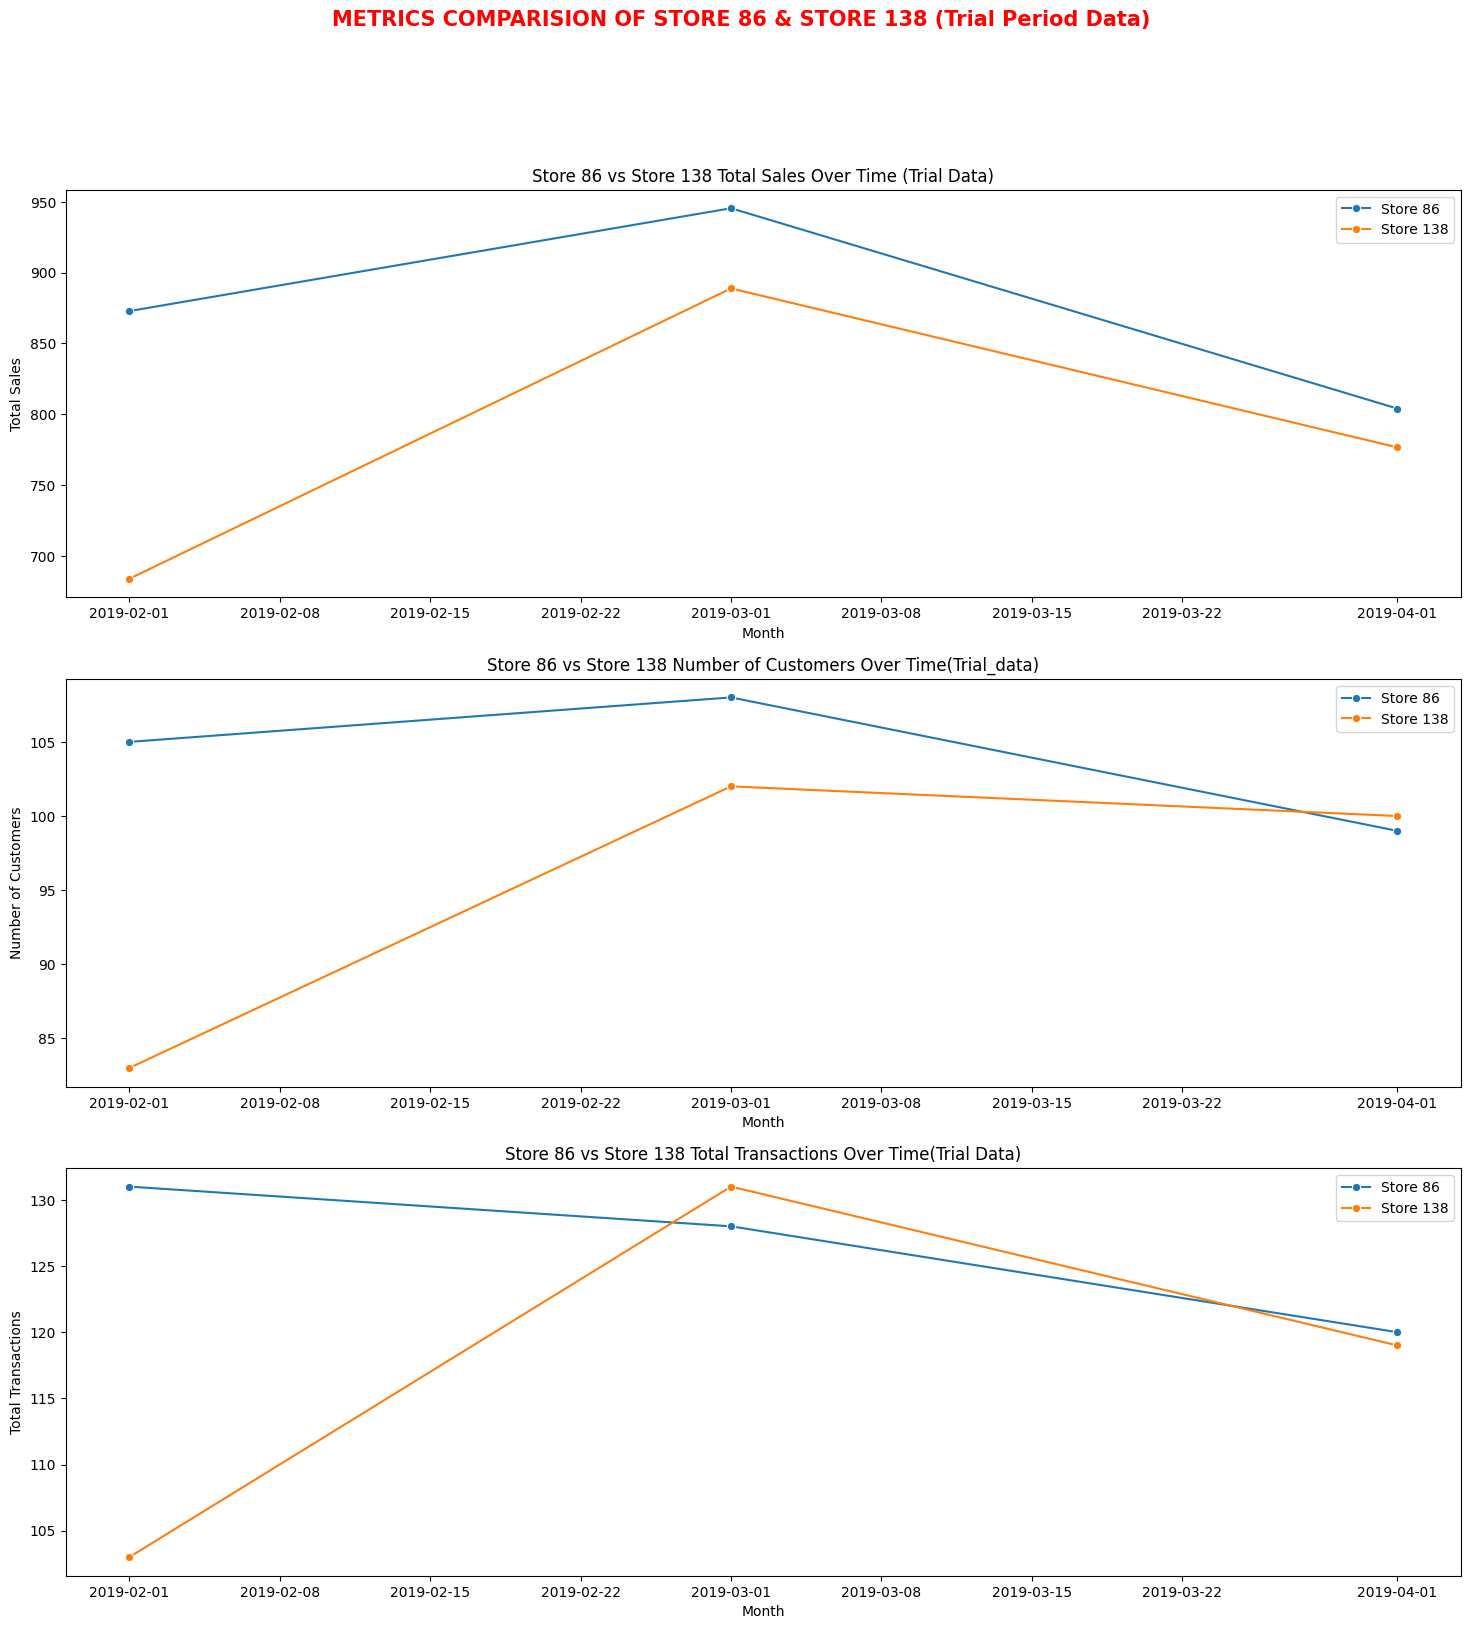

In [67]:
fig, axes=plt.subplots(3,1,figsize=(18,18))
ax=axes.flatten()
sns.lineplot(data=store_86_138_trial, x='MONTH_ID', y='86_TOTAL_SALES', marker='o', label='Store 86',ax=ax[0])
sns.lineplot(data=store_86_138_trial, x='MONTH_ID', y='138_TOTAL_SALES', marker='o', label='Store 138',ax=ax[0])
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Total Sales')
ax[0].set_title('Store 86 vs Store 138 Total Sales Over Time (Trial Data)')
ax[0].legend()

sns.lineplot(data=store_86_138_trial, x='MONTH_ID', y='86_NUMBER_CUSTOMERS', marker='o', label='Store 86',ax=ax[1])
sns.lineplot(data=store_86_138_trial, x='MONTH_ID', y='138_NUMBER_CUSTOMERS', marker='o', label='Store 138',ax=ax[1])
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Number of Customers')
ax[1].set_title('Store 86 vs Store 138 Number of Customers Over Time(Trial_data)')
ax[1].legend()

sns.lineplot(data=store_86_138_trial, x='MONTH_ID', y='86_TOTAL_TRANSACTIONS', marker='o', label='Store 86',ax=ax[2])
sns.lineplot(data=store_86_138_trial, x='MONTH_ID', y='138_TOTAL_TRANSACTIONS', marker='o', label='Store 138',ax=ax[2])
ax[2].set_xlabel('Month')
ax[2].set_ylabel('Total Transactions')
ax[2].set_title('Store 86 vs Store 138 Total Transactions Over Time(Trial Data)')
ax[2].legend()


plt.suptitle('METRICS COMPARISION OF STORE 86 & STORE 138 (Trial Period Data)',fontsize='15',fontweight='bold',color='red')





Visually the total Sales seems to be high in STORE 86, but is it significant statistically?
We need to check it 

In [61]:
print("="*100)
print("HYPOTHESIS TEST: STORE 86 (TRIAL) Vs STORE 138 (CONTROL)")
print("="*100)
print("\n Null Hypothesis(H0)): Trial store metric = Control store metric in Trial period")
print("\n Alternative Hypothesis(H1): Trial store metrics > Control store metric in Trial Period")
print("\n")
store_86_trial=trial_data[trial_data['STORE_NBR']==86][['MONTH_ID','TOTAL_SALES','NUMBER_CUSTOMERS','TOTAL_TRANSACTIONS']]
store_138_trial=trial_data[trial_data['STORE_NBR']==138][['MONTH_ID','TOTAL_SALES','NUMBER_CUSTOMERS','TOTAL_TRANSACTIONS']]

# One tailed Independent Samples T test
print("\n One-TAILED INDEPENDENT SAMPLES T-TEST")
#because h1 says "greater than", not just different
print("="*100)

#Test 1: Total SALES
t_stat_sales, p_value_sales_two=stats.ttest_ind(store_86_trial['TOTAL_SALES'],
                                                store_138_trial['TOTAL_SALES'])
p_value_sales=p_value_sales_two/2 if t_stat_sales >0 else 1 - (p_value_sales_two/2)
print(f"\n1. TOTAL SALES")
print(f"Store 86 {((store_86_trial['TOTAL_SALES'].mean()/store_138_trial['TOTAL_SALES'].mean()-1)*100):+.2f}% vs Store 138")
print(f"T_statistic:{t_stat_sales:.4f}")
print(f"p_value(one-tailed):{p_value_sales:.4f}")
if t_stat_sales > 0 and p_value_sales <0.05:
    print(f"Reject H0: Store 86 sales are significantly greater than store 138(p<0.05)")
elif t_stat_sales > 0:
    print(f"Fail to Reject H0: Store 86 sales sales are higher but Not significantly (p >=0.05)")
else:
    print(f"Fail to Reject H0: Store 86 sales are Lower than store 138")

# Test 2: Number Of Customers
t_stat_cust, p_value_cust_two=stats.ttest_ind(store_86_trial['NUMBER_CUSTOMERS'],
                                                store_138_trial['NUMBER_CUSTOMERS'])
p_value_cust= p_value_cust_two/ 2 if t_stat_cust > 0 else 1 - (p_value_cust_two/2)

print(f"\n2. NUMBER OF CUSTOMERS:")
print(f"Store 86{((store_86_trial['NUMBER_CUSTOMERS'].mean()/store_138_trial['NUMBER_CUSTOMERS'].mean()-1)*100):+.2f}% vs Store 138")
print(f"t-statistic:{t_stat_cust:.4f}")
print(f"p-value(one-tailed): {p_value_cust:.4f}")
if t_stat_cust > 0 and p_value_cust < 0.05:
    print(f" REJECT H0: Store 86 customers are Significantly Greater than store 138")
elif t_stat_cust > 0:
    print(f"Fail to Reject H0: Store 86 customers are higher but not significantly (p>=0.05)")
else:
    print(f"Fail to Reject H0: Store 86 customers are Lower than store 138")
    
#Test 3: Total_Transactions
t_stat_trans, p_value_trans_two=stats.ttest_ind(store_86_trial['TOTAL_TRANSACTIONS'],
                                            store_138_trial['TOTAL_TRANSACTIONS'])
p_value_trans=p_value_trans_two/2 if t_stat_trans > 0 else 1 - (p_value_trans_two/2)

print(f"\n3. Total Transactions")
print(f"Store 86 is {((store_86_trial['TOTAL_TRANSACTIONS'].mean()/store_138_trial['TOTAL_TRANSACTIONS'].mean()-1)*100):+.2f}% vs Store 138")
print(f"t_statistic:{t_stat_trans:.4f}")
print(f"p_value (one_tailed):{p_value_trans:.4f}")
if t_stat_trans > 0 and p_value_trans < 0.05:
    print(f"Reject H0: Store 86 transactions are SIGNIFICANTLY GREATER than Store 138 (p < 0.05)")
elif t_stat_trans > 0:
    print(f"Fail to Reject HO: Store 86 transactions are higher but NOT significantly (p >=0.05)")
else:
    print(f"Fail to Reject H0: Store 86 transactions are Lower than store 138")



HYPOTHESIS TEST: STORE 86 (TRIAL) Vs STORE 138 (CONTROL)

 Null Hypothesis(H0)): Trial store metric = Control store metric in Trial period

 Alternative Hypothesis(H1): Trial store metrics > Control store metric in Trial Period



 One-TAILED INDEPENDENT SAMPLES T-TEST

1. TOTAL SALES
Store 86 +11.62% vs Store 138
T_statistic:1.2645
p_value(one-tailed):0.1374
Fail to Reject H0: Store 86 sales sales are higher but Not significantly (p >=0.05)

2. NUMBER OF CUSTOMERS:
Store 86+9.47% vs Store 138
t-statistic:1.3672
p-value(one-tailed): 0.1217
Fail to Reject H0: Store 86 customers are higher but not significantly (p>=0.05)

3. Total Transactions
Store 86 is +7.37% vs Store 138
t_statistic:0.9905
p_value (one_tailed):0.1890
Fail to Reject HO: Store 86 transactions are higher but NOT significantly (p >=0.05)


#### OVERALL CONCLUSION:
The new store layout did not have statistically significnat impact on Store 86's performance. While all metrics(sales, customers, transactions) showed positive increases compared to the control store (Store 138), none of these increases were large enough to be considered statistically significant at the ⍺=0.05 level.

Business Interpretation:
* The layout change showed weak/inconclusive results for Store 86.
* The improvements could be due to random chance rather than the layout change
* This result contradicts store 77, which showed sales improvement.

Possible Reasons for Different Results
* Store-specific factor(location, customer demographics, store size)
* Implementation differences
* Local market conditions
* The layout change may work better in some store types than other

Recommendation
* We should further investigate why store 77 succeeded but store 86 didn't
* We should analyze if store 88 shows similar pattern to 77 or 86.

---

<center> Store 88 vs Store 201

In [62]:
store_88_trial=trial_data[trial_data['STORE_NBR']==88][['MONTH_ID','TOTAL_SALES','NUMBER_CUSTOMERS','TOTAL_TRANSACTIONS']]
store_88_trial=store_88_trial.rename(columns={'TOTAL_SALES':'88_TOTAL_SALES','NUMBER_CUSTOMERS':'88_NUMBER_CUSTOMERS','TOTAL_TRANSACTIONS':'88_TOTAL_TRANSACTIONS'})
store_88_trial

,MONTH_ID,88_TOTAL_SALES,88_NUMBER_CUSTOMERS,88_TOTAL_TRANSACTIONS
1008,201902,1339.6,122,151
1009,201903,1467.0,133,169
1010,201904,1317.0,119,150


In [63]:
store_201_trial=trial_data[trial_data['STORE_NBR']==201][['MONTH_ID','TOTAL_SALES','NUMBER_CUSTOMERS','TOTAL_TRANSACTIONS']]
store_201_trial=store_201_trial.rename(columns={'TOTAL_SALES':'201_TOTAL_SALES','NUMBER_CUSTOMERS':'201_NUMBER_CUSTOMERS','TOTAL_TRANSACTIONS':'201_TOTAL_TRANSACTIONS'})
store_201_trial

,MONTH_ID,201_TOTAL_SALES,201_NUMBER_CUSTOMERS,201_TOTAL_TRANSACTIONS
2341,201902,1006.6,101,115
2342,201903,1328.5,128,148
2343,201904,1205.8,121,142


In [64]:
store_88_201_trial=store_88_trial.merge(store_201_trial,on='MONTH_ID',how='inner')
store_88_201_trial['MONTH_ID']=pd.to_datetime(store_88_201_trial['MONTH_ID'],format='%Y%m')
store_88_201_trial

,MONTH_ID,88_TOTAL_SALES,88_NUMBER_CUSTOMERS,88_TOTAL_TRANSACTIONS,201_TOTAL_SALES,201_NUMBER_CUSTOMERS,201_TOTAL_TRANSACTIONS
0,2019-02-01,1339.6,122,151,1006.6,101,115
1,2019-03-01,1467.0,133,169,1328.5,128,148
2,2019-04-01,1317.0,119,150,1205.8,121,142


Text(0.5, 0.98, 'METRICS COMPARISION OF STORE 88 & STORE 201 (Trial Period Data)')

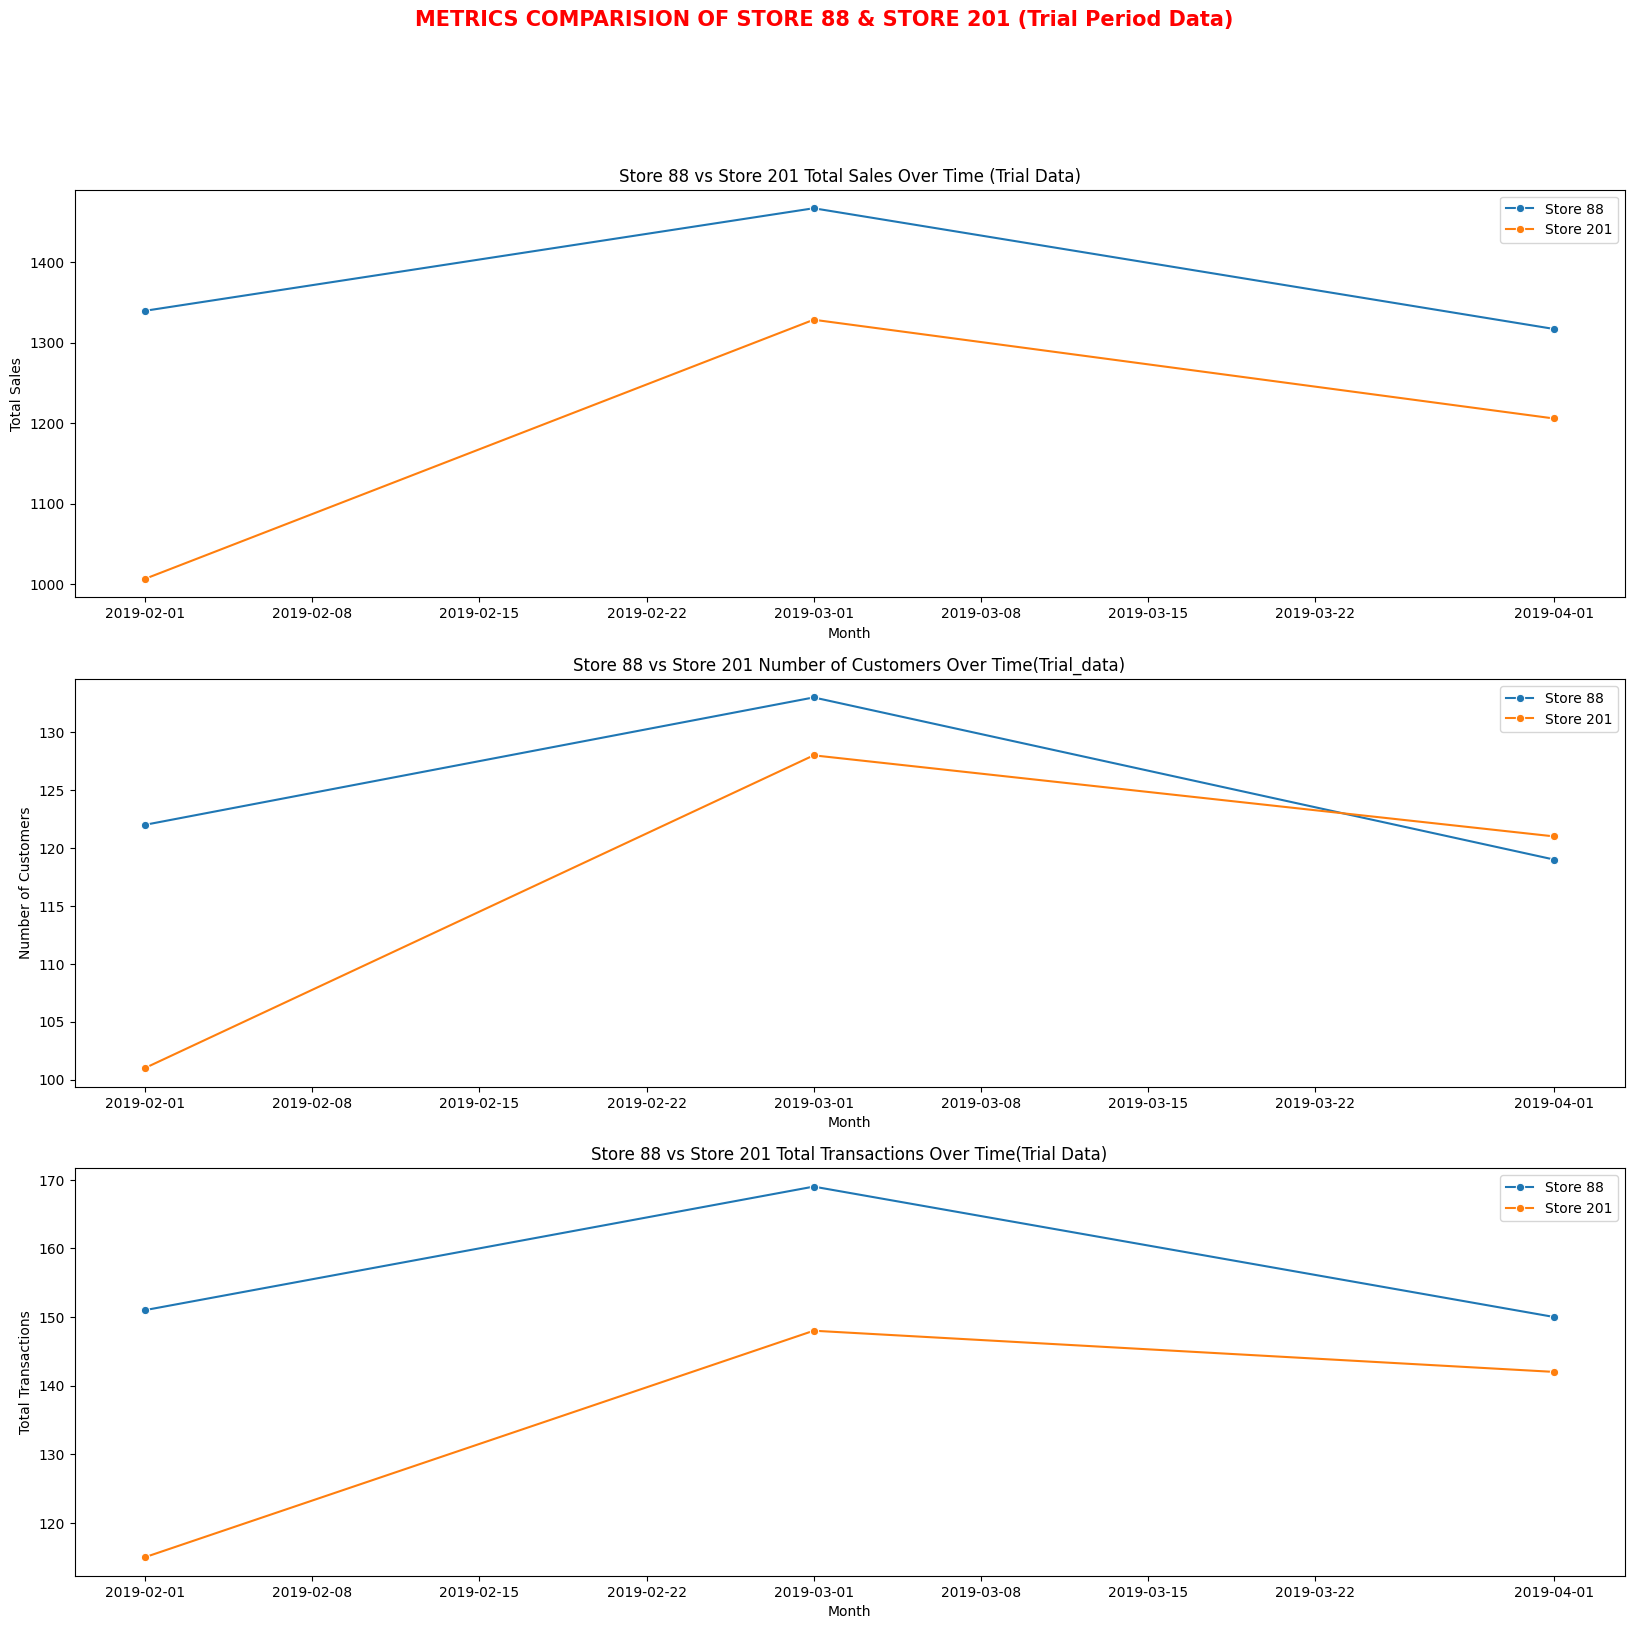

In [65]:
fig, axes=plt.subplots(3,1,figsize=(20,18))
ax=axes.flatten()
sns.lineplot(data=store_88_201_trial, x='MONTH_ID', y='88_TOTAL_SALES', marker='o', label='Store 88',ax=ax[0])
sns.lineplot(data=store_88_201_trial, x='MONTH_ID', y='201_TOTAL_SALES', marker='o', label='Store 201',ax=ax[0])
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Total Sales')
ax[0].set_title('Store 88 vs Store 201 Total Sales Over Time (Trial Data)')
ax[0].legend()

sns.lineplot(data=store_88_201_trial, x='MONTH_ID', y='88_NUMBER_CUSTOMERS', marker='o', label='Store 88',ax=ax[1])
sns.lineplot(data=store_88_201_trial, x='MONTH_ID', y='201_NUMBER_CUSTOMERS', marker='o', label='Store 201',ax=ax[1])
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Number of Customers')
ax[1].set_title('Store 88 vs Store 201 Number of Customers Over Time(Trial_data)')
ax[1].legend()

sns.lineplot(data=store_88_201_trial, x='MONTH_ID', y='88_TOTAL_TRANSACTIONS', marker='o', label='Store 88',ax=ax[2])
sns.lineplot(data=store_88_201_trial, x='MONTH_ID', y='201_TOTAL_TRANSACTIONS', marker='o', label='Store 201',ax=ax[2])
ax[2].set_xlabel('Month')
ax[2].set_ylabel('Total Transactions')
ax[2].set_title('Store 88 vs Store 201 Total Transactions Over Time(Trial Data)')
ax[2].legend()


plt.suptitle('METRICS COMPARISION OF STORE 88 & STORE 201 (Trial Period Data)',fontsize='15',fontweight='bold',color='red')





---

Visually, the store 88 (trial store seems to perform well, lets prove it statistically)

In [66]:
print("="*100)
print("HYPOTHESIS TEST: STORE 88 (TRIAL) Vs STORE 201 (CONTROL)")
print("="*100)
print("\n Null Hypothesis(H0)): Trial store metric = Control store metric in Trial period")
print("\n Alternative Hypothesis(H1): Trial store metrics > Control store metric in Trial Period")
print("\n")
store_88_trial=trial_data[trial_data['STORE_NBR']==88][['MONTH_ID','TOTAL_SALES','NUMBER_CUSTOMERS','TOTAL_TRANSACTIONS']]
store_201_trial=trial_data[trial_data['STORE_NBR']==201][['MONTH_ID','TOTAL_SALES','NUMBER_CUSTOMERS','TOTAL_TRANSACTIONS']]

# One tailed Independent Samples T test
print("\n One-TAILED INDEPENDENT SAMPLES T-TEST")
#because h1 says "greater than", not just different
print("="*100)

#Test 1: Total SALES
t_stat_sales, p_value_sales_two=stats.ttest_ind(store_88_trial['TOTAL_SALES'],
                                                store_201_trial['TOTAL_SALES'])
p_value_sales=p_value_sales_two/2 if t_stat_sales >0 else 1 - (p_value_sales_two/2)
print(f"\n1. TOTAL SALES")
print(f"Store 88 {((store_88_trial['TOTAL_SALES'].mean()/store_201_trial['TOTAL_SALES'].mean()-1)*100):+.2f}% vs Store 201")
print(f"T_statistic:{t_stat_sales:.4f}")
print(f"p_value(one-tailed):{p_value_sales:.4f}")
if t_stat_sales > 0 and p_value_sales <0.05:
    print(f"Reject H0: Store 88 sales are significantly greater than store 201(p<0.05)")
elif t_stat_sales > 0:
    print(f"Fail to Reject H0: Store 88 sales sales are higher but Not significantly (p >=0.05)")
else:
    print(f"Fail to Reject H0: Store 88 sales are Lower than store 201")

# Test 2: Number Of Customers
t_stat_cust, p_value_cust_two=stats.ttest_ind(store_88_trial['NUMBER_CUSTOMERS'],
                                                store_201_trial['NUMBER_CUSTOMERS'])
p_value_cust= p_value_cust_two/ 2 if t_stat_cust > 0 else 1 - (p_value_cust_two/2)

print(f"\n2. NUMBER OF CUSTOMERS:")
print(f"Store 88{((store_88_trial['NUMBER_CUSTOMERS'].mean()/store_201_trial['NUMBER_CUSTOMERS'].mean()-1)*100):+.2f}% vs Store 201")
print(f"t-statistic:{t_stat_cust:.4f}")
print(f"p-value(one-tailed): {p_value_cust:.4f}")
if t_stat_cust > 0 and p_value_cust < 0.05:
    print(f" REJECT H0: Store 88 customers are Significantly Greater than store 201")
elif t_stat_cust > 0:
    print(f"Fail to Reject H0: Store 88 customers are higher but not significantly (p>=0.05)")
else:
    print(f"Fail to Reject H0: Store 88 customers are Lower than store 201")
    
#Test 3: Total_Transactions
t_stat_trans, p_value_trans_two=stats.ttest_ind(store_88_trial['TOTAL_TRANSACTIONS'],
                                            store_201_trial['TOTAL_TRANSACTIONS'])
p_value_trans=p_value_trans_two/2 if t_stat_trans > 0 else 1 - (p_value_trans_two/2)

print(f"\n3. Total Transactions")
print(f"Store 88 is {((store_88_trial['TOTAL_TRANSACTIONS'].mean()/store_201_trial['TOTAL_TRANSACTIONS'].mean()-1)*100):+.2f}% vs Store 201")
print(f"t_statistic:{t_stat_trans:.4f}")
print(f"p_value (one_tailed):{p_value_trans:.4f}")
if t_stat_trans > 0 and p_value_trans < 0.05:
    print(f"Reject H0: Store 88 transactions are SIGNIFICANTLY GREATER than Store 201 (p < 0.05)")
elif t_stat_trans > 0:
    print(f"Fail to Reject H0: Store 88 transactions are higher but NOT significantly (p >=0.05)")
else:
    print(f"Fail to Reject H0: Store 88 transactions are Lower than store 201")



HYPOTHESIS TEST: STORE 88 (TRIAL) Vs STORE 201 (CONTROL)

 Null Hypothesis(H0)): Trial store metric = Control store metric in Trial period

 Alternative Hypothesis(H1): Trial store metrics > Control store metric in Trial Period



 One-TAILED INDEPENDENT SAMPLES T-TEST

1. TOTAL SALES
Store 88 +16.46% vs Store 201
T_statistic:1.8538
p_value(one-tailed):0.0687
Fail to Reject H0: Store 88 sales sales are higher but Not significantly (p >=0.05)

2. NUMBER OF CUSTOMERS:
Store 88+6.86% vs Store 201
t-statistic:0.8752
p-value(one-tailed): 0.2154
Fail to Reject H0: Store 88 customers are higher but not significantly (p>=0.05)

3. Total Transactions
Store 88 is +16.05% vs Store 201
t_statistic:1.8239
p_value (one_tailed):0.0711
Fail to Reject H0: Store 88 transactions are higher but NOT significantly (p >=0.05)


#### Overall conclusions for store 88 <br>

The new store layout did Not have a statistically significant impact on Store 88's performance at the ⍺=0.05 significance level.

Key Observations:
* Boderine results: Sales (p=0.0687) and Transactions (p=0.0711) were VERY close to being significnat.
* All metrics showed positive trends (all increase between 6-16%)
* The improvements were not strong enough to conclusively attribute them to the layout change rather than random variation.

Comparsion Across All Stores:
* Store 77: significnat sucess (sales p=0.0445)
* Store 86: Not significant (all p_values > 0.10)
* Store 88: Borderline but not significant (p-values ~0.07)



    

---

### Overall conclusion:

In all the three trial stores we see a postive increase in sales, number of customers and total transactions.
In store 77 the growth is significant as backed by the statistic. In other stores the growth is not as significant 
but the p-values are at borderline level showing some positive indications. 

So, from this we can understand couple of things
* Store layout works well for store 77
* Its inconclusive for Store 88 and no clear benefit for store 86 (even if in some months the growth is significant, in an averge it is inconclusive.)
* We can confidently implement the new layout in store 77 but for other trial store, there are no 
evidences(certain evidence of efectiveness)
* More stores and longer trial periods can guarantee more conclusive results.



----

---